In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from functools import reduce
import re as re
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
import warnings
warnings.filterwarnings('ignore')
sns.set()
plt.style.use('fivethirtyeight')

In [ ]:
# Loading all "csv" files.
# I named the files as per the orginal name associated with "csv" files.
framenames =[]
varsname =[]
for file in os.listdir("DataSet"):    
    if file.endswith(".csv"):
        filepath = os.path.join("DataSet", file)
        name = [i.split(".") for i in file.split("_")]
        name = reduce(lambda x, y: x + y ,name)[:-1]
        name = "_".join(name)
        vars()[name] = pd.read_csv(filepath, encoding = 'unicode_escape')
        print(name)
        framenames.append(name)
        varsname.append(vars()[name])

credit_card_balance


In [363]:
train = pd.read_csv("DataSet/application_train.csv")

In [364]:
test = pd.read_csv("DataSet/application_test.csv")

In [24]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [ ]:
application_test = reduce_mem(application_test)
HomeCredit_columns_description = reduce_mem(HomeCredit_columns_description )
POS_CASH_balance = reduce_mem(POS_CASH_balance)
credit_card_balance = reduce_mem(credit_card_balance)
installments_payments = reduce_mem(installments_payments)
application_train = reduce_mem(application_train)
bureau= reduce_mem(bureau)
previous_application = reduce_mem(previous_application )
bureau_balance = reduce_mem(bureau_balance)

In [365]:
test = reduce_mem(test)
train = reduce_mem(train)

Memory usage of dataframe is 45.00 MB
Memory usage after optimization is: 14.60 MB
Decreased by 67.6%
Memory usage of dataframe is 286.23 MB
Memory usage after optimization is: 92.38 MB
Decreased by 67.7%


In [366]:
test.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

In [ ]:
dfs =  [application_test,HomeCredit_columns_description,POS_CASH_balance,credit_card_balance,installments_payments,
       application_train,bureau, previous_application, bureau_balance, sample_submission]



## EDA of application_train

#### Exploring the missing values

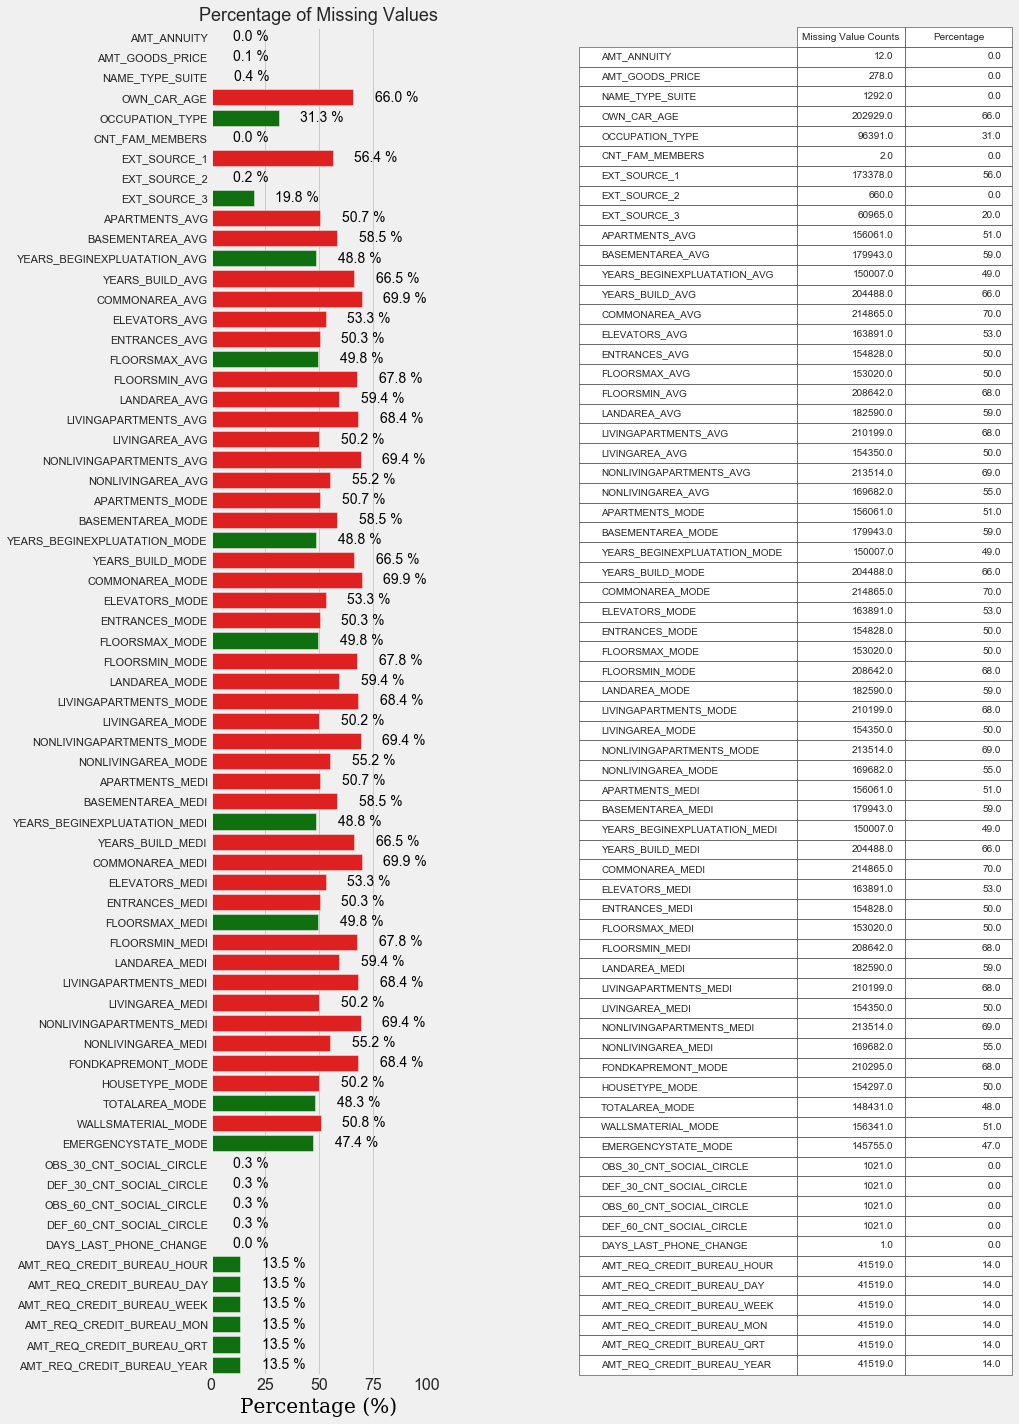

In [63]:
def missing_values(df, figsize=(10, 20)):
    plt.style.use('fivethirtyeight')
    misval= df.isnull().sum()
    df_misval = pd.DataFrame(misval[misval!=0])
    df_misval.columns = ['frequency']
    df_misval["percentage"] = (df_misval/len(df))*100
    #df_misval =df_misval
    
    # If there are more than 50 % values are missing, it will appear as red. 
    colors = ['red' if (x > 50.00) else 'green' for x in df_misval['percentage']]
    # Now Plotting missing values as well as the dataframe
    f, (ax1, ax2) = plt.subplots(1,2, figsize=figsize)

    b= sns.barplot(x= "percentage", y = df_misval.index,
                data = df_misval, palette=colors, label = "biggest", ax = ax1)
    font = {'family': 'serif','color':  'black', 'weight': 'normal','size': 20}
    b.set_xlim(0,100)
    b.set_xlabel("Percentage (%)", fontdict = font)
    b.set_title("Percentage of Missing Values", fontsize = 18)
    
    # Annotaing the acutal number
    for index, row in df_misval.reset_index().iterrows():
        b.text(10+row.percentage,row.name, str(round(row.percentage,1)) + " %", color='black', va="center")
    ax1.tick_params(axis = 'x', which = 'both', labelsize = 16)

    # adding the data frame as a subplot
    bbox=[1.5, 0, 1, 1]
    ax2.axis('off')
    mpl_table = ax2.table(cellText = np.round(df_misval.values),
                          rowLabels = df_misval.index,
                         bbox = bbox, colLabels=["Missing Value Counts", "Percentage"],
                          colLoc='center')
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(10)
    #sns.set(font_scale = 1)

    plt.rc("font")
    plt.tight_layout()
    f.tight_layout()
    plt.savefig("missing_values.pdf", dpi=300,
                bbox_extra_artists=(b, mpl_table), bbox_inches='tight' )
    
    return ax1, ax2

ax1,ax2 = missing_values(train)

There are lot of missing values; for some columns it is over 50% (shown as red). we need to deal with the missing values before building up machine learning models and we need to deal with it separately for int and object columns. So let's see what object columns contain missing values:


##### Missing values for object  or categorical columns

(<matplotlib.axes._subplots.AxesSubplot at 0x1a13e8a5f8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a166a66d8>)

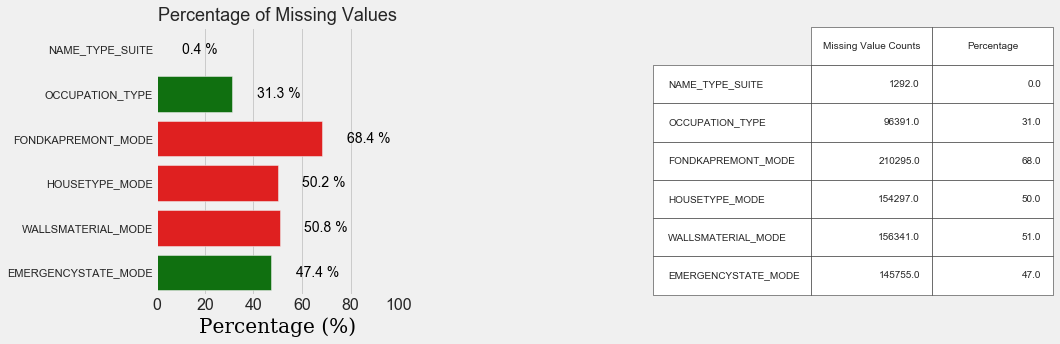

In [64]:
missing_values(train.select_dtypes(include ="object"),figsize=(10,5))

##### Distribution of unique classes in object columns

Number of Unique categories in the object columns: 

 NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                8
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               19
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             5
HOUSETYPE_MODE                 4
WALLSMATERIAL_MODE             8
EMERGENCYSTATE_MODE            3
dtype: int64 

Distribution of Category Variables:



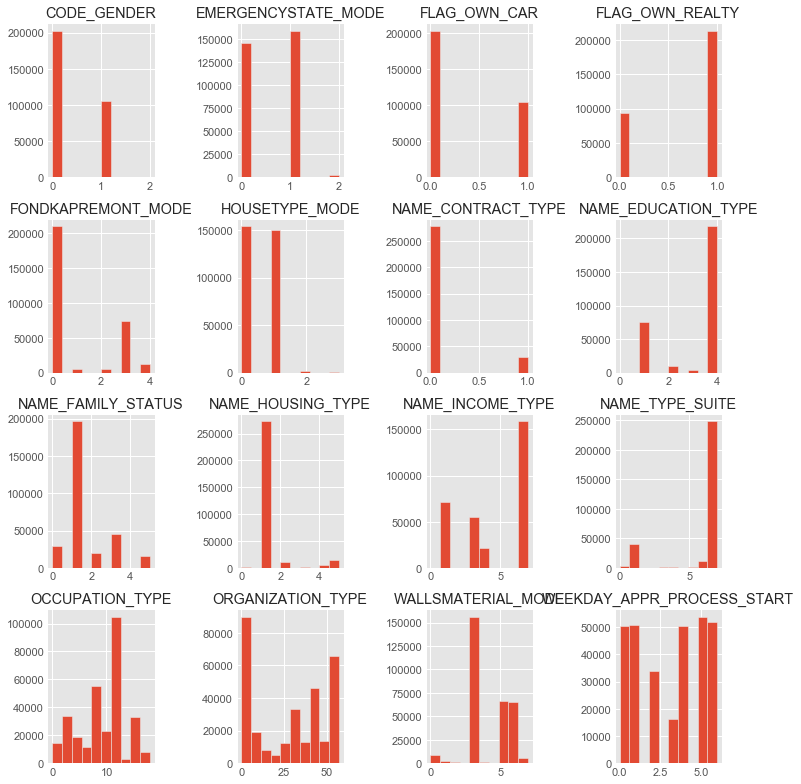

In [297]:
def category_distribution(df):
    # Selecting object columns
    plt.style.use('ggplot')
    le = LabelEncoder()
    train_object = df.select_dtypes(include ="object")
    object_columns = df.select_dtypes(include ="object").columns
    # Converting np.nan to "NAN"
    for i in object_columns:
        train_object[i].replace(np.nan, 'NaN', inplace=True)
    # Applying label_encoder
    train_object_le= train_object.apply(le.fit_transform)

    train_object_le.hist(figsize=[11,11])
    plt.tight_layout()
    # Number of unique classes in each class object
    print("Number of Unique categories in the object columns:",
          "\n\n",train_object.apply(pd.Series.nunique, axis = 0),"\n")
    print("Distribution of Category Variables:\n")
category_distribution(train)

#### Clearly the categories in the object columns are not balanced except the "WEEKDAY_APPR_PROCESS_START". 

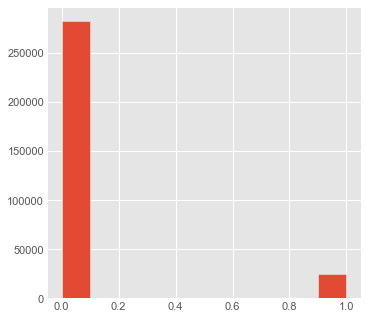

In [298]:
# Distribution of target variables
train.TARGET.hist(figsize=[5,5])


##### We need to deal with category variables. We will use both LabelEncoder (for columns with two catergories) and OneHotEncoder ( for the rest)


#### Distribution of target variables are not balanced as well, so we need to do some operations. 

In [368]:
def encode(df):
    le = LabelEncoder()
    oe = OneHotEncoder()
    le_col=[]
    for col in df:
        if df[col].dtype =="object":
            if df[col].nunique()==2:
                df[col].replace(np.nan, "NAN", inplace=True)
                le_col.append(col)
                le.fit(df[col])
                df[col] = le.transform(df[col])
    print("These {} columns ({}) are label encoded".format(len(le_col), le_col))
    print("Dimensions before OneHotEncoding : {}".format(df.shape))
    df = pd.get_dummies(df)
    print("Dimensions after OneHotEncoding : {}".format(df.shape))
    
    return df
                
train =encode(train)
train.head()


These 4 columns (['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE']) are label encoded
Dimensions before OneHotEncoding : (307511, 122)
Dimensions after OneHotEncoding : (307511, 242)


SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100002       1                   0             0                1   
1      100003       0                   0             0                0   
2      100004       0                   1             1                1   
3      100006       0                   0             0                1   
4      100007       0                   0             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

             ...              HOUSETYPE_MODE_block of flats  \
0            ...                                          1   
1            ...                                          1   
2            ...                                          0   
3            ...                                          0   
4            ...                                          0   

   HOUSETYPE_MODE_specific housing  HOUSETYPE_MODE_terraced house  \
0                                0                              0   
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   

   WALLSMATERIAL_MODE_Block  WALLSMATERIAL_MODE_Mixed  \
0                         0                         0   
1                         1                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   WALLSMATERIAL_MODE_Monolithic  WALLSMATERIAL_MODE_Others  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   WALLSMATERIAL_MODE_Panel  WALLSMATERIAL_MODE_Stone, brick  \
0                         0                                1   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   WALLSMATERIAL_MODE_Wooden  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 242 columns]

In [369]:
test = encode(test)
test.head()

These 5 columns (['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE']) are label encoded
Dimensions before OneHotEncoding : (48744, 121)
Dimensions after OneHotEncoding : (48744, 237)


SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100001                   0            0             0                1   
1      100005                   0            1             0                1   
2      100013                   0            1             1                1   
3      100028                   0            0             0                1   
4      100038                   0            1             1                0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

             ...              HOUSETYPE_MODE_block of flats  \
0            ...                                          1   
1            ...                                          0   
2            ...                                          0   
3            ...                                          1   
4            ...                                          0   

   HOUSETYPE_MODE_specific housing  HOUSETYPE_MODE_terraced house  \
0                                0                              0   
1                                0                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   

   WALLSMATERIAL_MODE_Block  WALLSMATERIAL_MODE_Mixed  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   WALLSMATERIAL_MODE_Monolithic  WALLSMATERIAL_MODE_Others  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   WALLSMATERIAL_MODE_Panel  WALLSMATERIAL_MODE_Stone, brick  \
0                         0                                1   
1                         0                                0   
2                         0                                0   
3                         1                                0   
4                         0                                0   

   WALLSMATERIAL_MODE_Wooden  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 237 columns]

#### It looks like the dimensions of train and test data are not same, which is because of some categorical object didn't show up in the test data. So we need to aling train and test data. 

In [370]:
def align(train, test):
    
    print(" Shape of train data before alinging: {}".format(train.shape),"\n", 
         "Shape of test data before alinging: {}".format(test.shape))
    target = train["TARGET"]
    train, test = train.align(test, join="inner", axis =1)
    train["TARGET"] = target
    print(" Shape of train data after alinging: {}".format(train.shape), "\n", 
     "Shape of test data after alinging: {}".format(test.shape))
    return train, test
train, test = align(train, test)

 Shape of train data before alinging: (307511, 242) 
 Shape of test data before alinging: (48744, 237)
 Shape of train data after alinging: (307511, 237) 
 Shape of test data after alinging: (48744, 236)


#### Anomalies in Data

There are more than 100 features, so checking the description of each column to find anomalies is not feasible. Fishing out the outliers by z-score could be a way to go, but there are some features such as income and debt which contain values significantly higher than the mean, and these are real! We can try to visualize all the data, hoping if there are any anomalies, it will be detected upon inspection. Additionally,  it will give us idea about the data more clearly. 

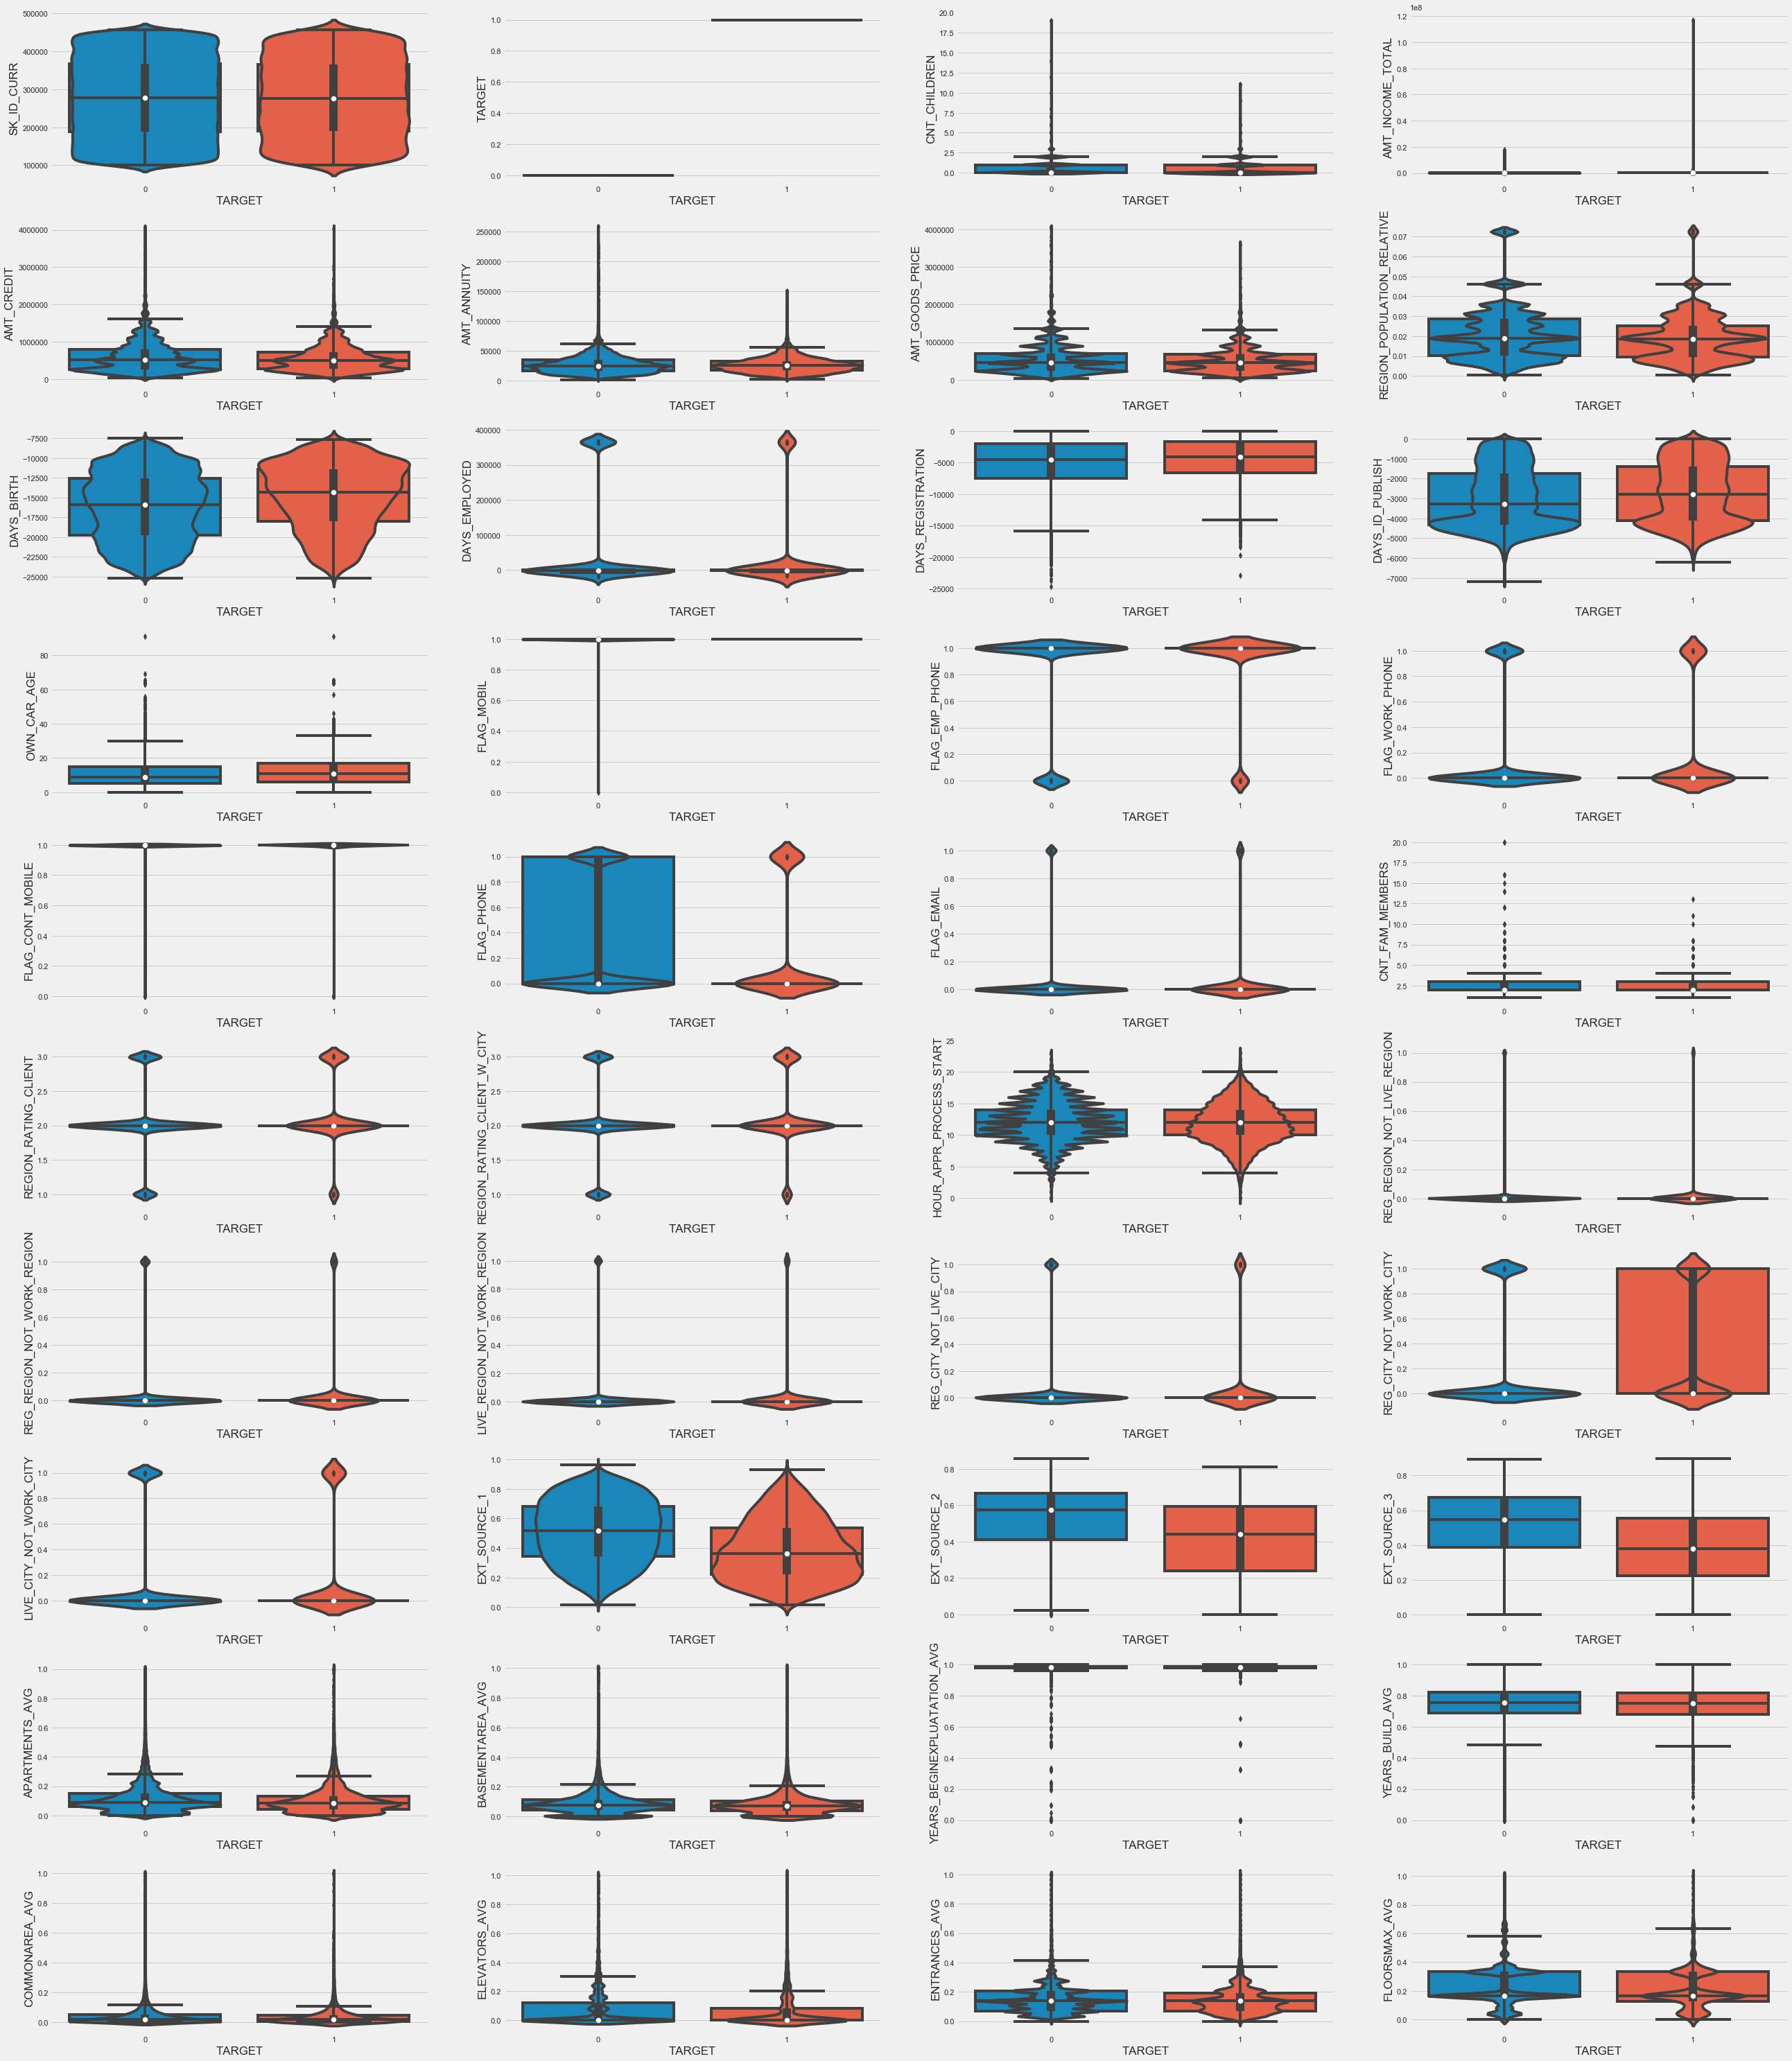

In [27]:
def violinplot(df, cols):
    """
    This will plot both violin and box plot on top of each othere for 
    each features, which would be better to understand the data,
    for the categories of the target variable.
    The dataframe has to contain 40 features to use this function.
    """
    
    plt.figure(figsize =(40,50))
    for idx, ft in enumerate(cols):
        plt.subplot(len(cols)/4,4, idx+1)
        sns.violinplot(y=df[ft], x=df["TARGET"])
        sns.boxplot(y=df[ft], x=df["TARGET"])

cols = train.select_dtypes(exclude ="object").columns
violinplot(train, num_cols[:40])

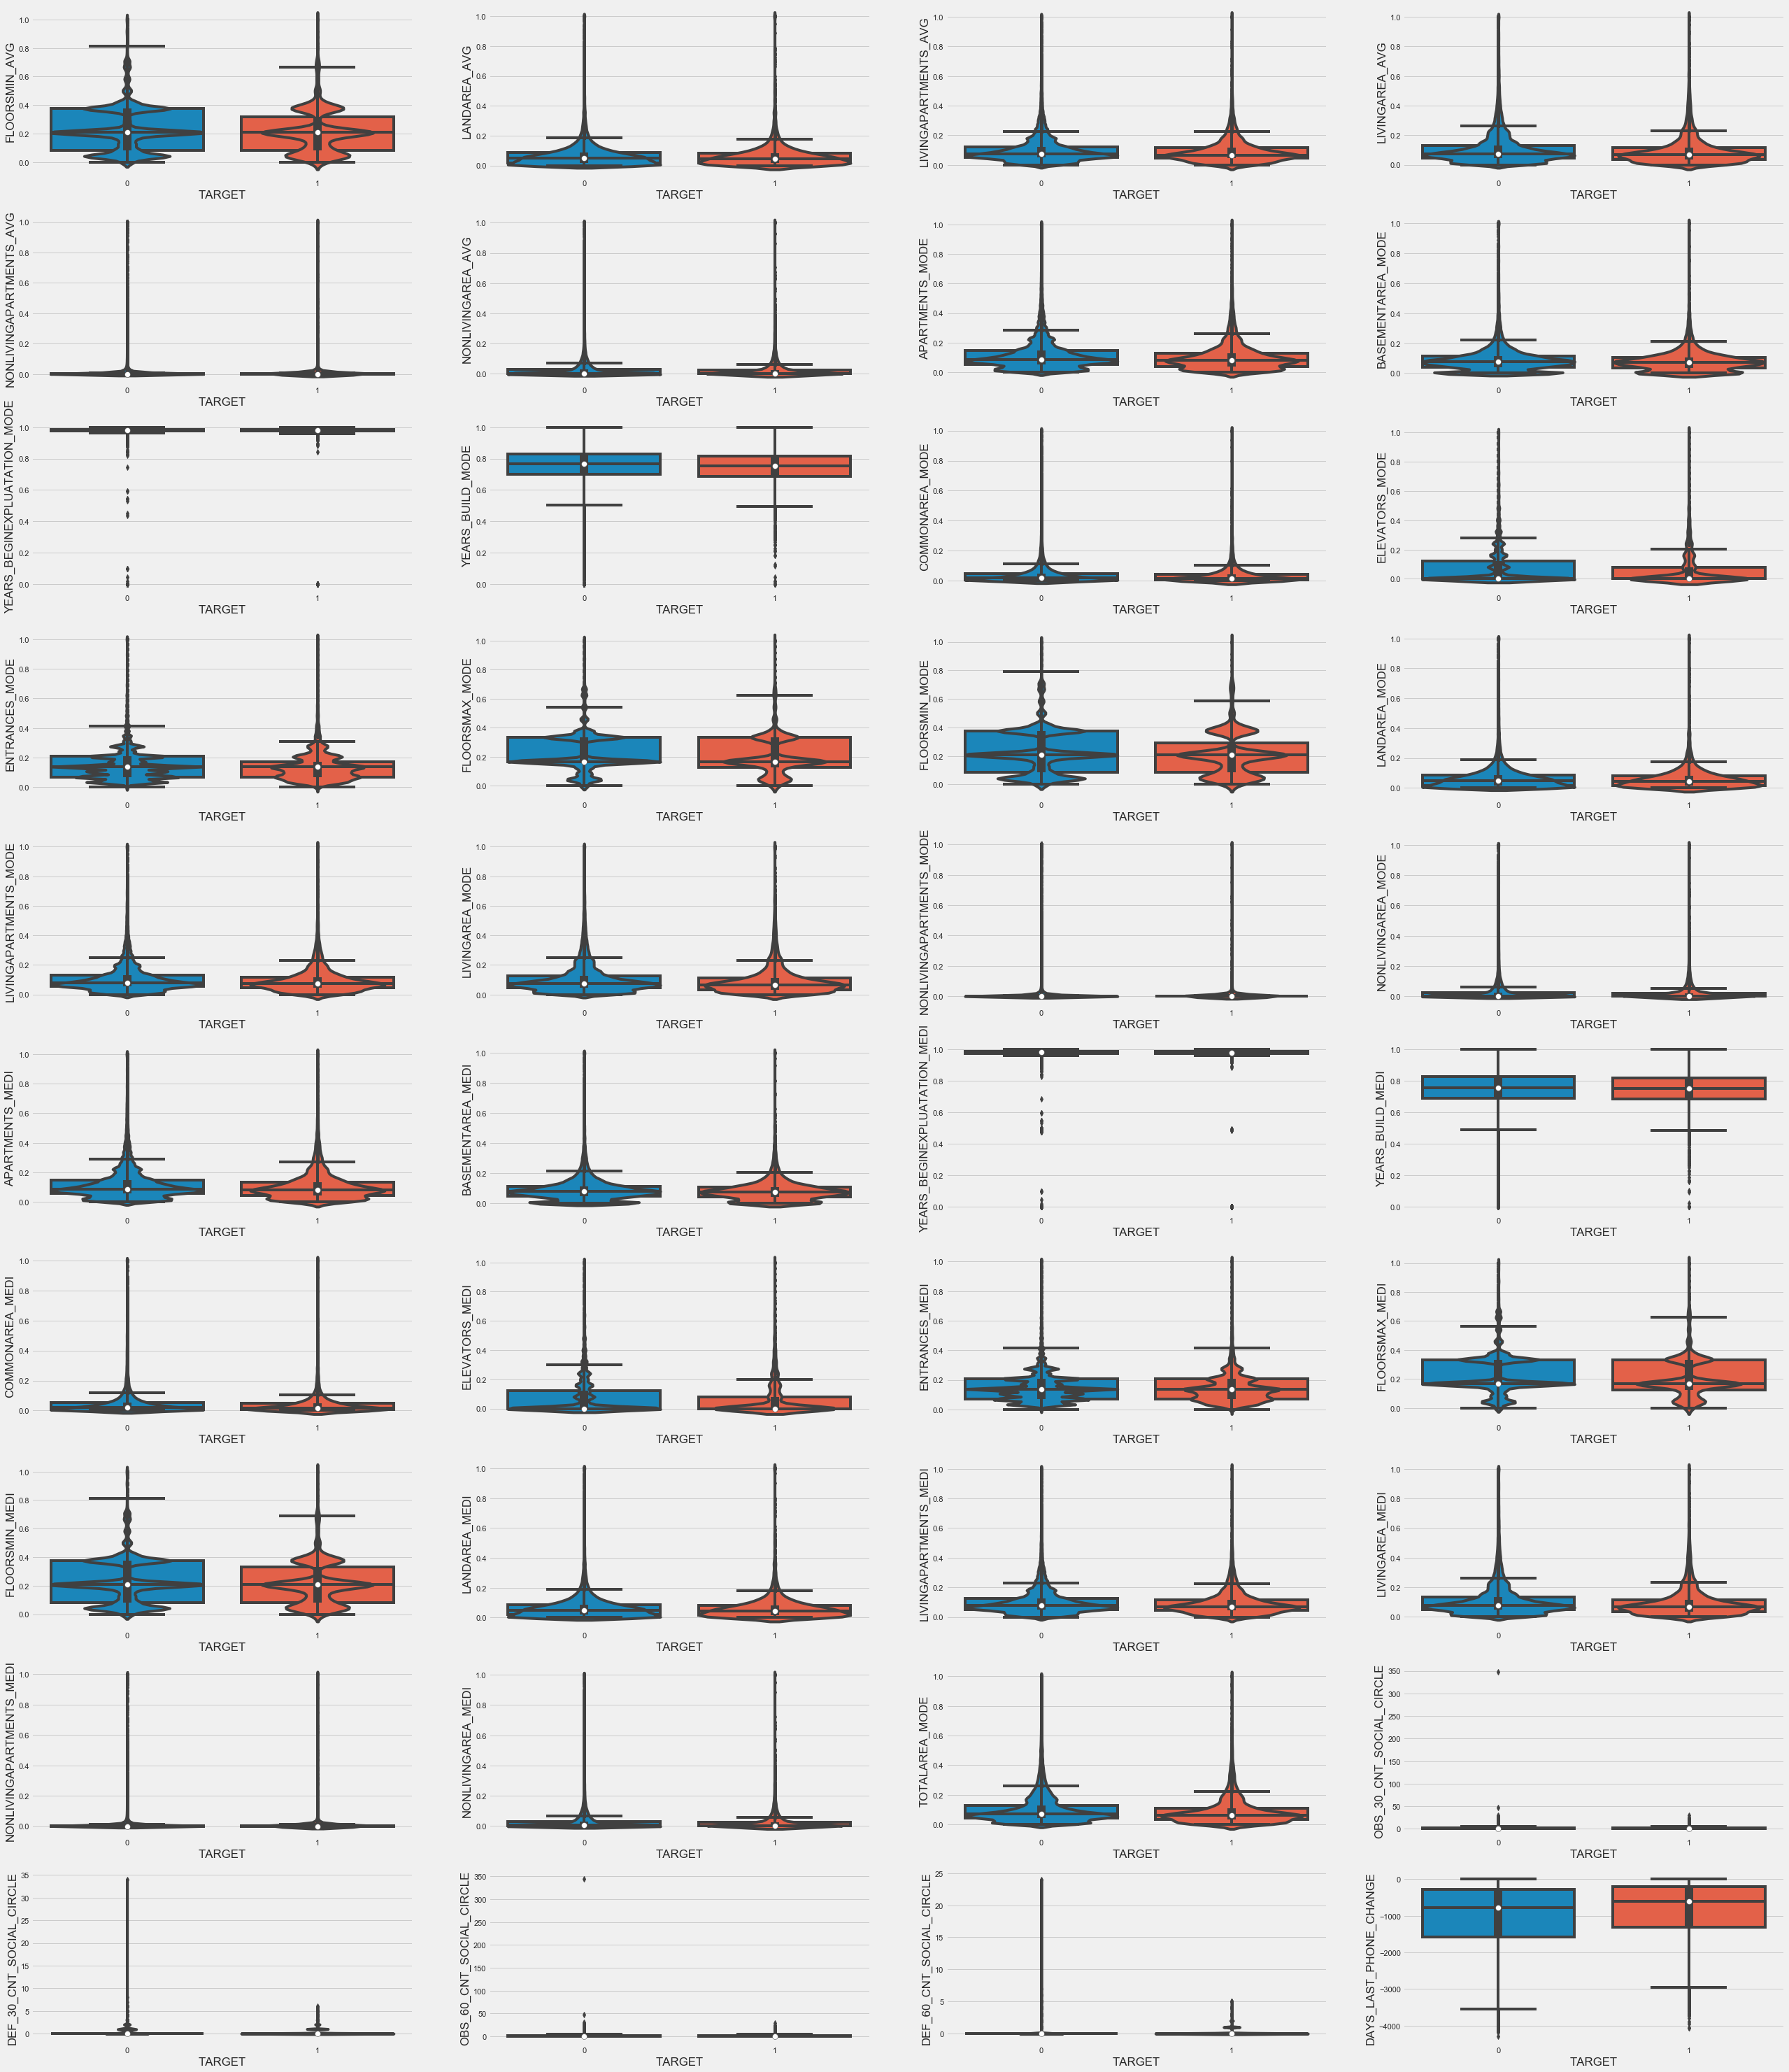

In [41]:
violinplot(train, num_cols[40:80])

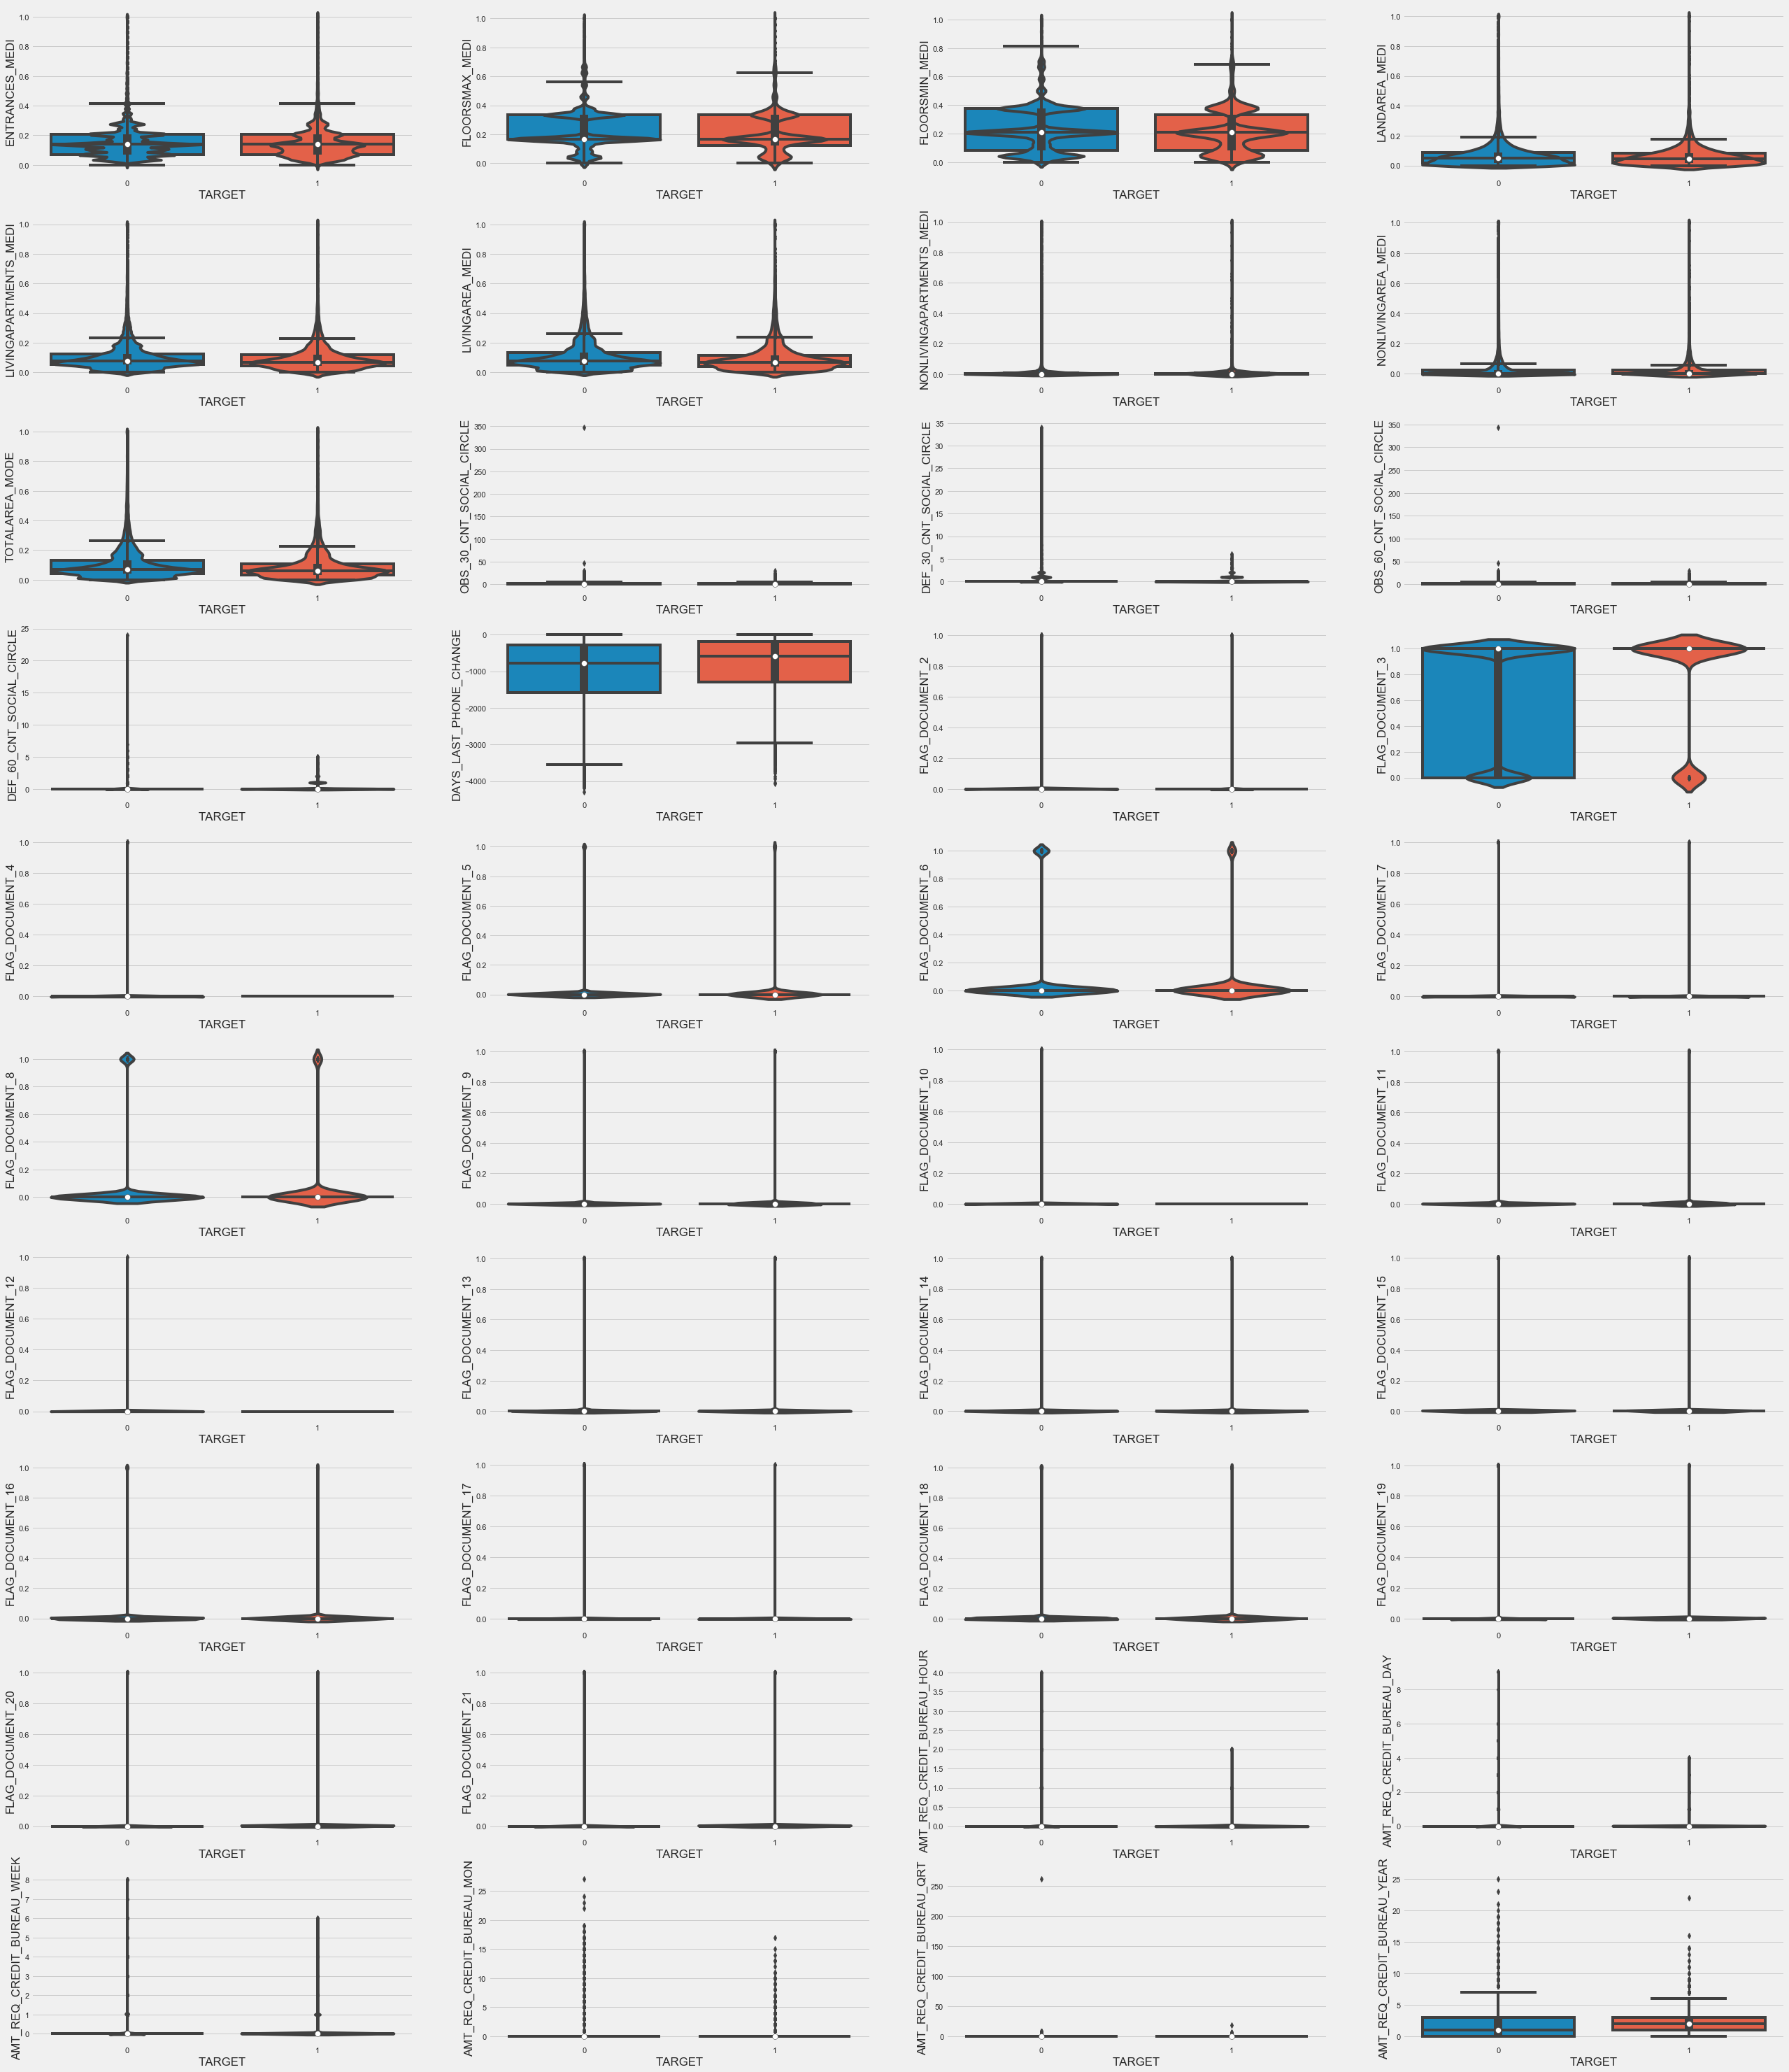

In [42]:
violinplot(train, num_cols[66:])

It looks like the feature 'DAYS_EMPLOYED' may have some issues, which is clearly showing two distributions. Let's look it more closely. 

Text(0.5,0,'Years Employed')

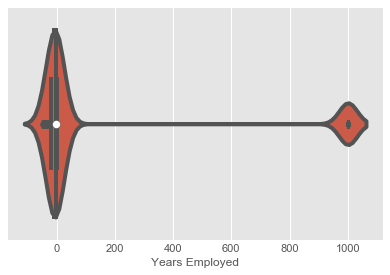

In [71]:
sns.violinplot(x= train['DAYS_EMPLOYED']/365);
sns.boxplot(x= train['DAYS_EMPLOYED']/365)
plt.xlabel("Years Employed")

1000 years employment doesn't make sense! And, there are two distributions.  
Thanks to Will Koehrsen (https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction), who pointed out that this anomaly could have some value in machine learning. Let's look at this. 

In [10]:
anom = train[train['DAYS_EMPLOYED'] == 365243]
non_anom = train[train['DAYS_EMPLOYED'] != 365243]

print('The non-anomalies default on {} of loans'.format(np.round(100 * non_anom['TARGET'].mean(),2)))
print('The anomalies default on {}  of loans'.format(np.round(100 * anom['TARGET'].mean(),2)))
print('There are {}  anomalous days of employment'.format(len(anom)))
      


The non-anomalies default on 8.66 of loans
The anomalies default on 5.4  of loans
There are 55374  anomalous days of employment


In [373]:
# Making a new column for anomalies, which will be used in our machine learning model, and replacing it with NaN
def anomaly_correction(df, feature = "DAYS_EMPLOYED", integer=365243):
    df['Birth_ANMALY'] = (df[feature]==integer).astype(int)

    df[feature].replace({integer: np.nan}, inplace =True )
    return df
train = anomaly_correction(train, feature = "DAYS_EMPLOYED", integer=365243)
test = anomaly_correction(test, feature = "DAYS_EMPLOYED", integer=365243)

In [374]:
# Changing the negative values into positive.
train[["DAYS_EMPLOYED","DAYS_BIRTH"]] = train[["DAYS_EMPLOYED","DAYS_BIRTH"]].apply(lambda x: x*(-1))
test[["DAYS_EMPLOYED","DAYS_BIRTH"]]= test[["DAYS_EMPLOYED","DAYS_BIRTH"]].apply(lambda x: x*(-1))

In [375]:
test.head()

SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100001                   0             0                1   
1      100005                   0             0                1   
2      100013                   0             1                1   
3      100028                   0             0                1   
4      100038                   0             1                0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   REGION_POPULATION_RELATIVE      ...       HOUSETYPE_MODE_specific housing  \
0                    0.018845      ...                                     0   
1                    0.035797      ...                                     0   
2                    0.019104      ...                                     0   
3                    0.026398      ...                                     0   
4                    0.010033      ...                                     0   

   HOUSETYPE_MODE_terraced house  WALLSMATERIAL_MODE_Block  \
0                              0                         0   
1                              0                         0   
2                              0                         0   
3                              0                         0   
4                              0                         0   

   WALLSMATERIAL_MODE_Mixed  WALLSMATERIAL_MODE_Monolithic  \
0                         0                              0   
1                         0                              0   
2                         0                              0   
3                         0                              0   
4                         0                              0   

   WALLSMATERIAL_MODE_Others  WALLSMATERIAL_MODE_Panel  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         1   
4                          0                         0   

   WALLSMATERIAL_MODE_Stone, brick  WALLSMATERIAL_MODE_Wooden  Birth_ANMALY  
0                                1                          0             0  
1                                0                          0             0  
2                                0                          0             0  
3                                0                          0             0  
4                                0                          0             0  

[5 rows x 237 columns]

#### Now we will look into some features with relative high importance with respect to target variable through correlation function (though it is not a great way to understand the importance). 

In [376]:
corr = train.corr()['TARGET'].sort_values()
print("Positively correlated features are:\n",corr.tail(20))
print("Negatively correlated features are:\n",corr.head(20))

Positively correlated features are:
 NAME_HOUSING_TYPE_With parents                       0.029966
OCCUPATION_TYPE_Drivers                              0.030303
DEF_60_CNT_SOCIAL_CIRCLE                             0.031276
DEF_30_CNT_SOCIAL_CIRCLE                             0.032248
LIVE_CITY_NOT_WORK_CITY                              0.032518
OWN_CAR_AGE                                          0.037612
DAYS_REGISTRATION                                    0.041975
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
DAYS_LAST_PHONE_CHANGE                               0.055219
NAME_INCOME_TYPE_Working         

Now let's know more about top 6 features linked to loan default.

In [43]:
def kdeplot(df, feature_list = None, plot_style = 'ggplot' ): 
    plt.style.use(plot_style)
    plt.figure(figsize =(8,18))
    for idx, ft in enumerate(feature_list):
        plt.subplot(len(feature_list),1, idx+1)

        sns.kdeplot(df.loc[df["TARGET"]==1, ft], shade =True, cut =0, label ="Defaulted Client (1)")
        
        sns.kdeplot(df.loc[df["TARGET"]==0, ft], shade =True, cut =0, label ="Good Client (0)")
        
        one = (df.loc[df["TARGET"]==1, ft]).max()
        zero = (df.loc[df["TARGET"]==0, ft]).max()
        ymax = max(one,zero)
        #plt.ylim(0,ymax)
        plt.title("Distribution of {} ".format(ft))
        plt.xlabel("{}".format(ft))
        plt.ylabel("Distributions")


    plt.tight_layout(pad=1.8,h_pad = 2.5, rect =(0,0,1,1))



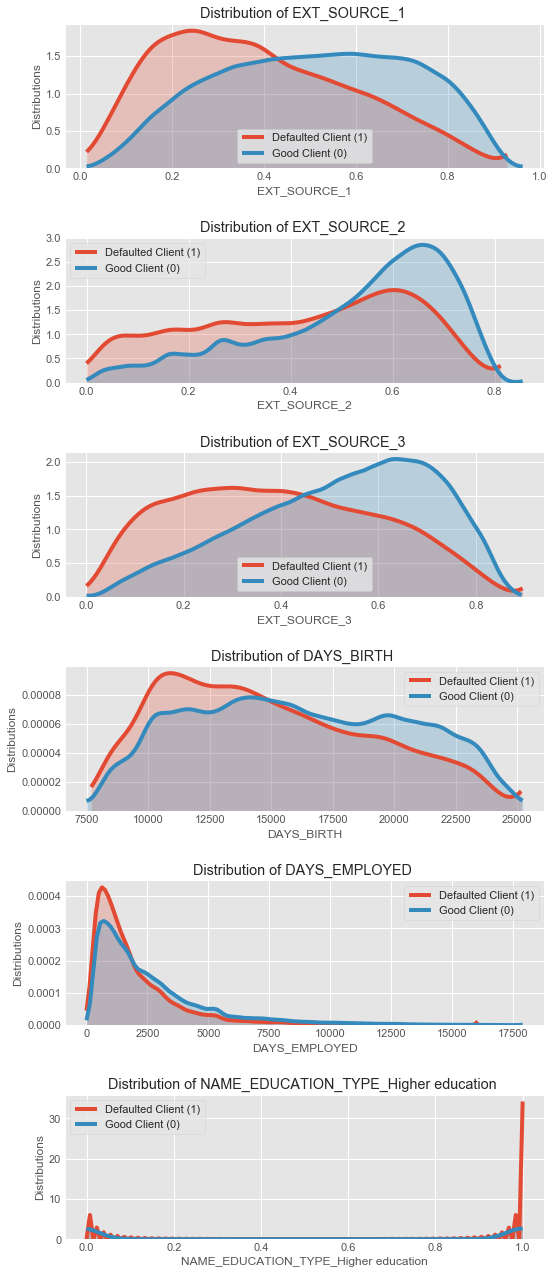

In [287]:
# visaualizing the relationship of Top 6 features with the target variables
kdeplot(train, feature_list = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
                               "DAYS_BIRTH","DAYS_EMPLOYED", "NAME_EDUCATION_TYPE_Higher education"])

More Visualizations through HeatMap! I will divide the dataframe by the TARGET variables, which will make it easier to understand the heatmap. 

In [279]:
coer_heat =  train[["TARGET",'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
                               "DAYS_BIRTH","DAYS_EMPLOYED", "NAME_EDUCATION_TYPE_Higher education"]]
coer_heat.rename(columns={"NAME_EDUCATION_TYPE_Higher education":"HIGHER_EDUCATION"}, inplace =True)
# Good Clients
coer_heat_0 =  coer_heat[coer_heat.TARGET==0]
coer_heat_0= coer_heat_0.drop("TARGET",axis =1)
# Defaulted Clients
coer_heat_1 =  coer_heat[coer_heat.TARGET==1]
coer_heat_1= coer_heat_1.drop("TARGET",axis =1)


In [281]:
coer_heat.corr()

TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
TARGET            1.000000     -0.155318     -0.160471     -0.178918   
EXT_SOURCE_1     -0.155318      1.000000      0.213984      0.186842   
EXT_SOURCE_2     -0.160471      0.213984      1.000000      0.109166   
EXT_SOURCE_3     -0.178918      0.186842      0.109166      1.000000   
DAYS_BIRTH       -0.078239      0.600611      0.091996      0.205477   
DAYS_EMPLOYED    -0.074958      0.252713      0.093444      0.129718   
HIGHER_EDUCATION -0.056593      0.135179      0.124581     -0.022430   

                  DAYS_BIRTH  DAYS_EMPLOYED  HIGHER_EDUCATION  
TARGET             -0.078239      -0.074958         -0.056593  
EXT_SOURCE_1        0.600611       0.252713          0.135179  
EXT_SOURCE_2        0.091996       0.093444          0.124581  
EXT_SOURCE_3        0.205477       0.129718         -0.022430  
DAYS_BIRTH          1.000000       0.352321         -0.115808  
DAYS_EMPLOYED       0.352321       1.000000         -0.003662  
HIGHER_EDUCATION   -0.115808      -0.003662          1.000000

#### Good Clients

In [282]:
coer_heat_0.corr()

EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH  \
EXT_SOURCE_1          1.000000      0.197893      0.166547    0.601211   
EXT_SOURCE_2          0.197893      1.000000      0.084596    0.078158   
EXT_SOURCE_3          0.166547      0.084596      1.000000    0.197286   
DAYS_BIRTH            0.601211      0.078158      0.197286    1.000000   
DAYS_EMPLOYED         0.248172      0.081557      0.121413    0.352662   
HIGHER_EDUCATION      0.128425      0.120595     -0.032987   -0.126496   

                  DAYS_EMPLOYED  HIGHER_EDUCATION  
EXT_SOURCE_1           0.248172          0.128425  
EXT_SOURCE_2           0.081557          0.120595  
EXT_SOURCE_3           0.121413         -0.032987  
DAYS_BIRTH             0.352662         -0.126496  
DAYS_EMPLOYED          1.000000         -0.009338  
HIGHER_EDUCATION      -0.009338          1.000000

#### Defaulted Clients

In [283]:
coer_heat_1.corr()

EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH  \
EXT_SOURCE_1          1.000000      0.171440      0.139623    0.570050   
EXT_SOURCE_2          0.171440      1.000000      0.077753    0.108661   
EXT_SOURCE_3          0.139623      0.077753      1.000000    0.171617   
DAYS_BIRTH            0.570050      0.108661      0.171617    1.000000   
DAYS_EMPLOYED         0.221363      0.094253      0.085477    0.307018   
HIGHER_EDUCATION      0.113100      0.082051     -0.026811   -0.042125   

                  DAYS_EMPLOYED  HIGHER_EDUCATION  
EXT_SOURCE_1           0.221363          0.113100  
EXT_SOURCE_2           0.094253          0.082051  
EXT_SOURCE_3           0.085477         -0.026811  
DAYS_BIRTH             0.307018         -0.042125  
DAYS_EMPLOYED          1.000000          0.000702  
HIGHER_EDUCATION       0.000702          1.000000

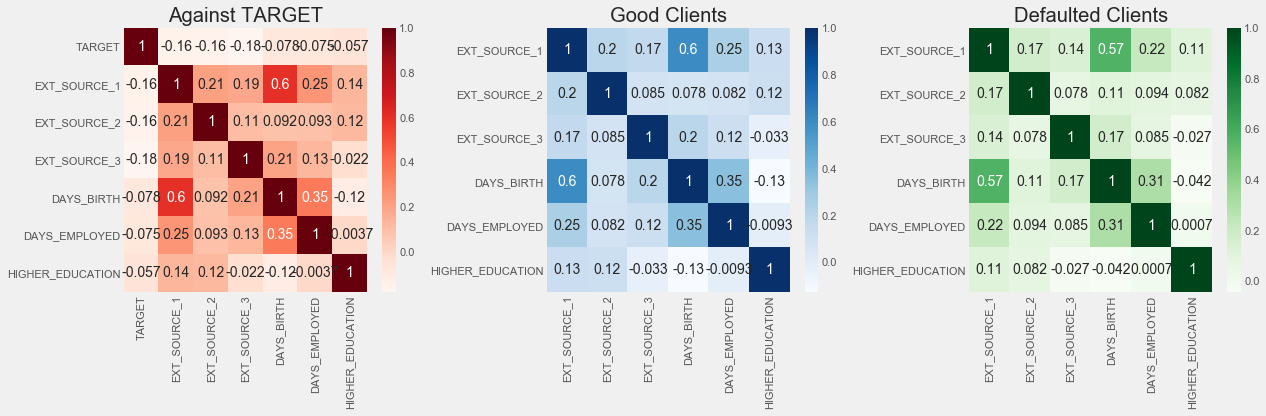

In [286]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(18,6))
sns.heatmap(coer_heat.corr(), cmap = "Reds", annot = True, ax = ax1)
ax1.set_title("Against TARGET")
sns.heatmap(coer_heat_0.corr(), cmap = "Blues", annot = True, ax =ax2)
ax2.set_title("Good Clients")

sns.heatmap(coer_heat_1.corr(), cmap = "Greens", annot = True, ax =ax3)
ax3.set_title("Defaulted Clients")

plt.tight_layout()

### Even better realtionships among the features can be illustrated in 2D Distribution plots. Let's do that. 

In [290]:
t1 = "Good Clients" + " (" + "a" +", "+ "b" + ")"
t1

'Good Clients (a, b)'

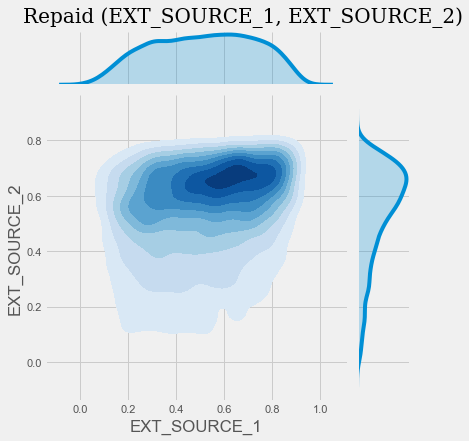

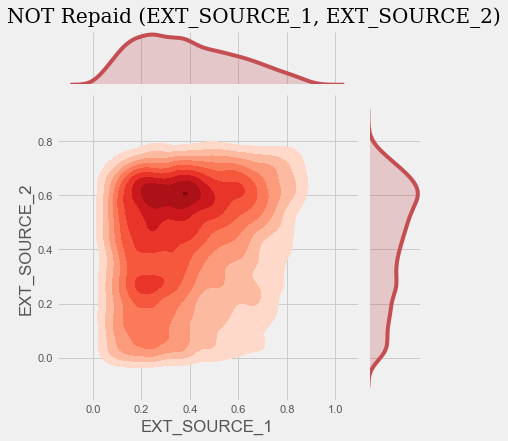

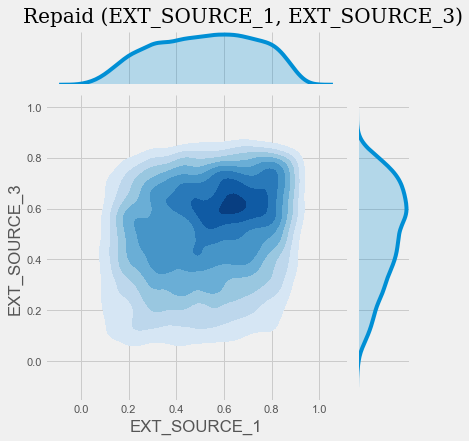

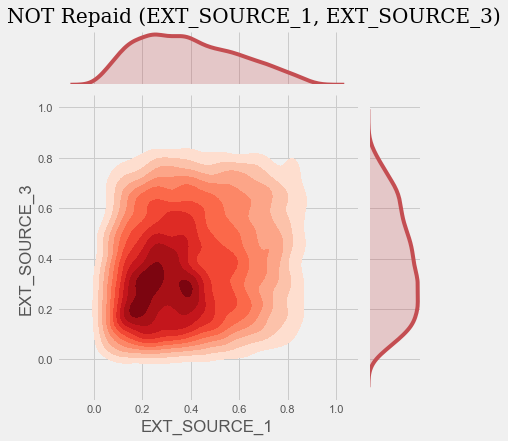

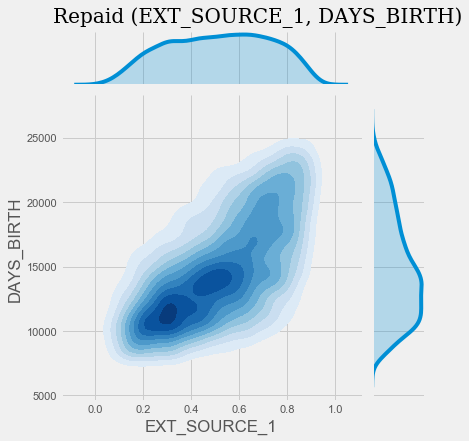

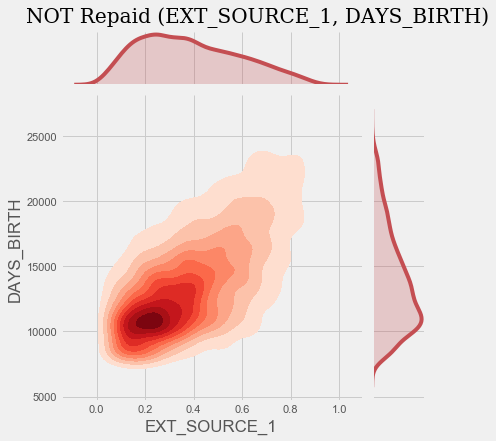

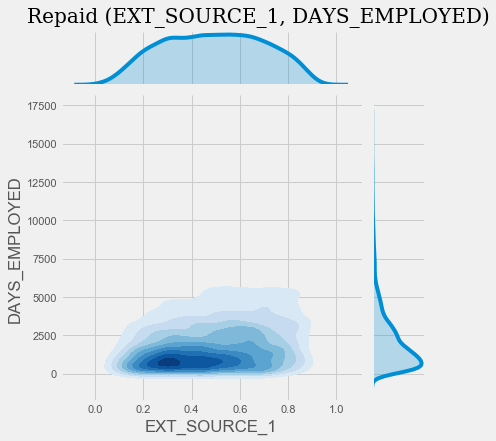

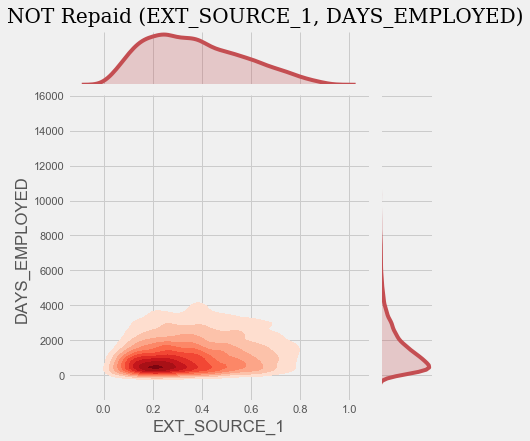

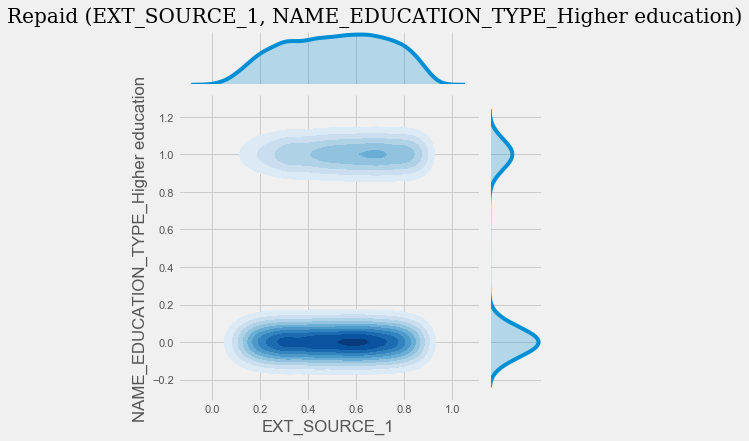

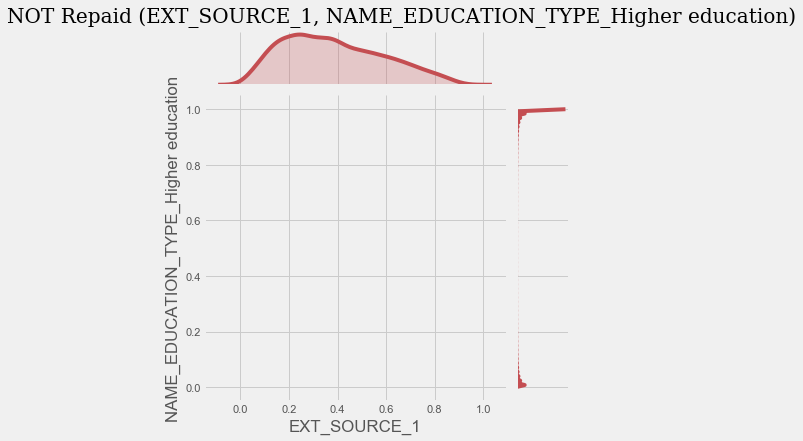

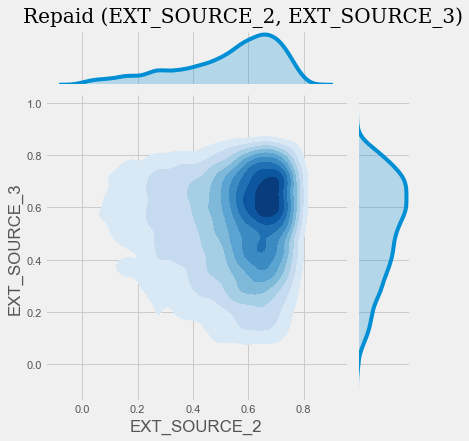

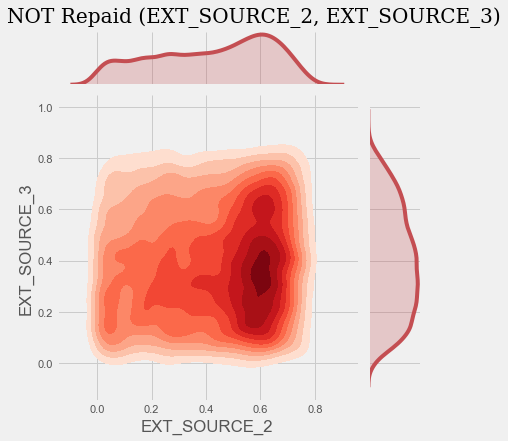

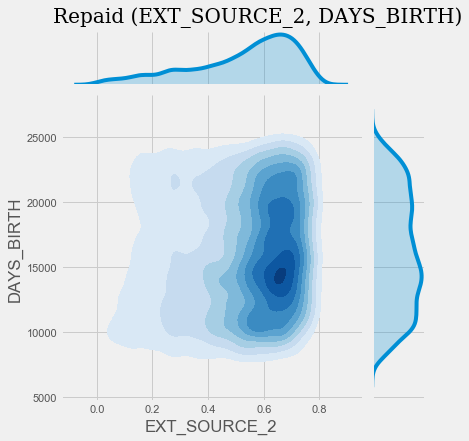

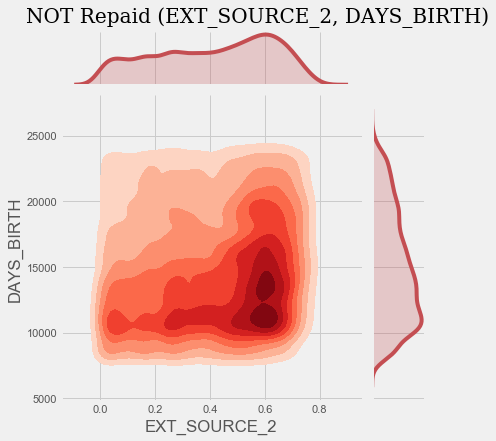

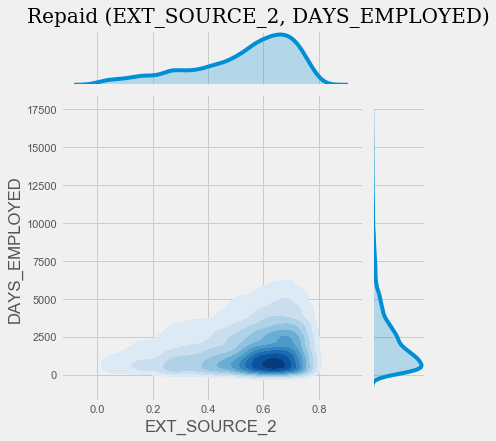

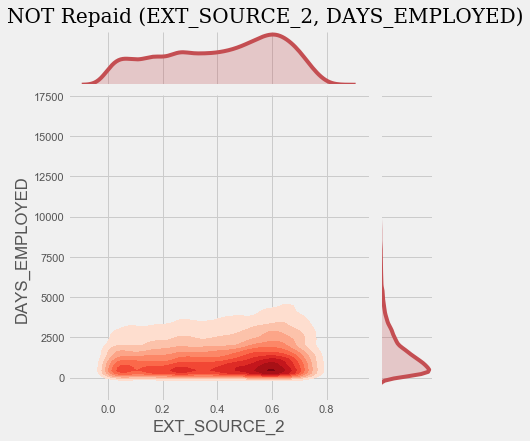

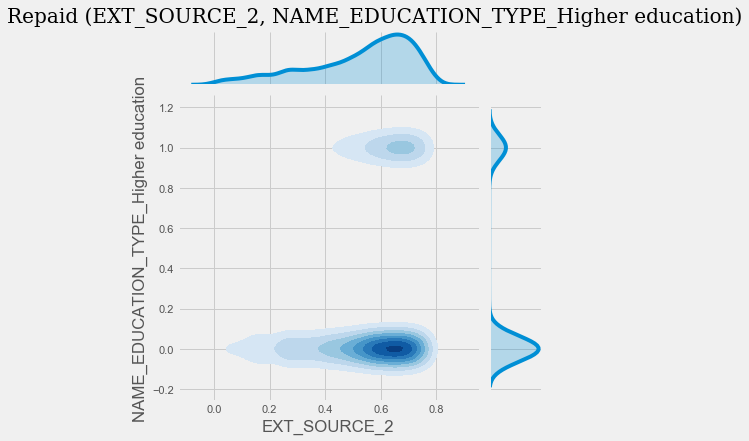

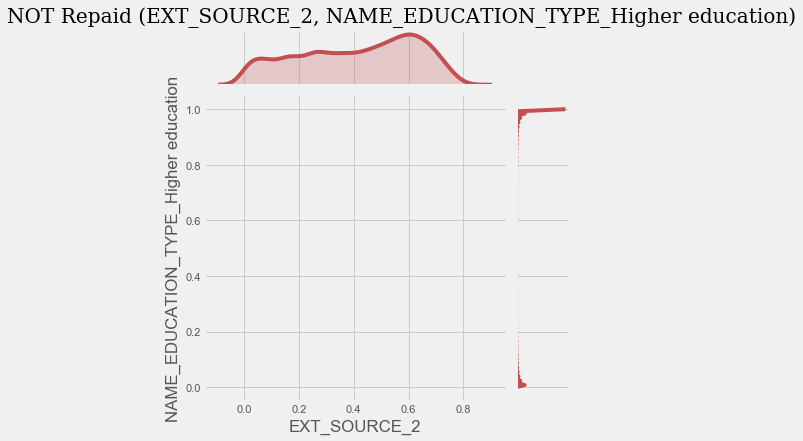

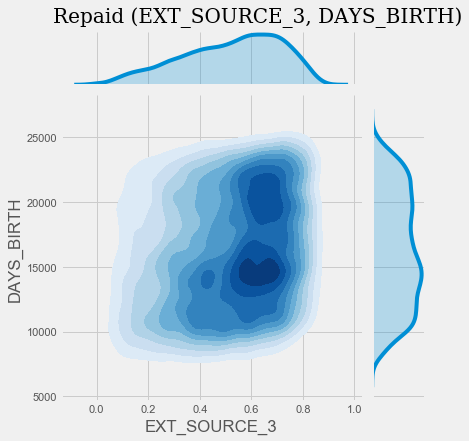

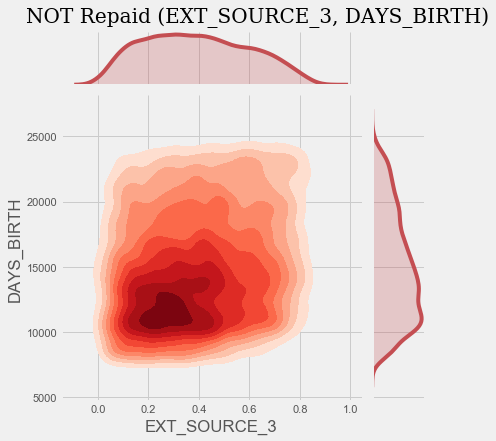

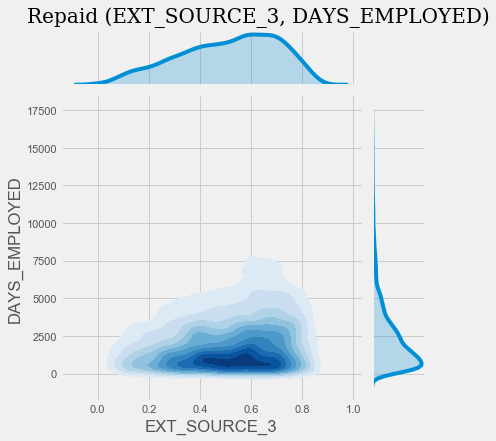

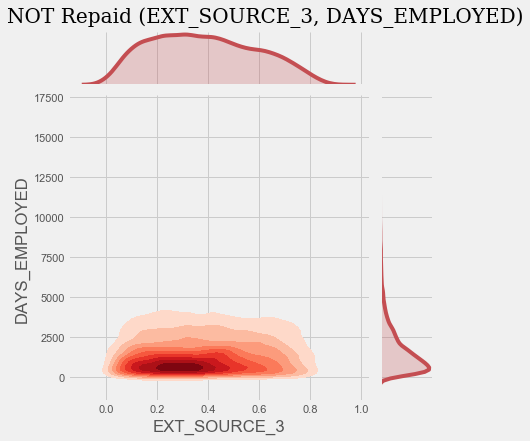

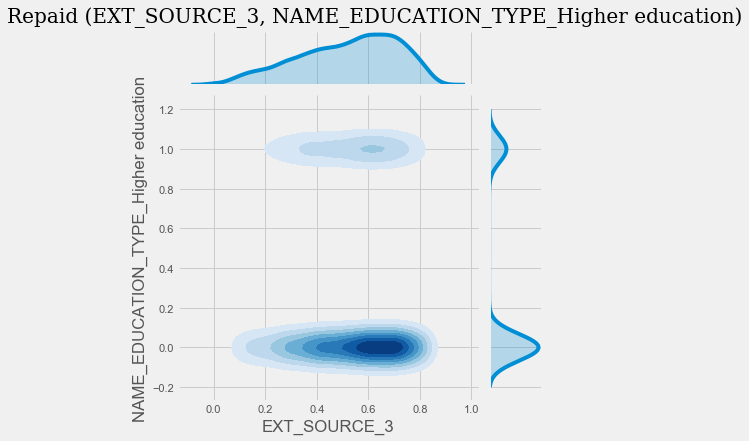

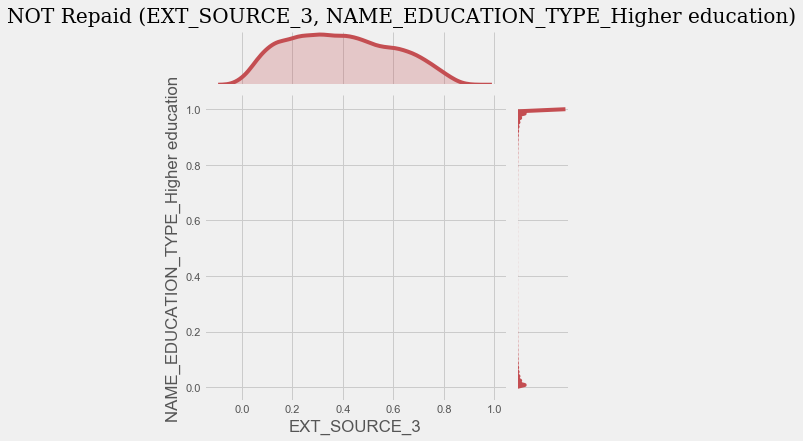

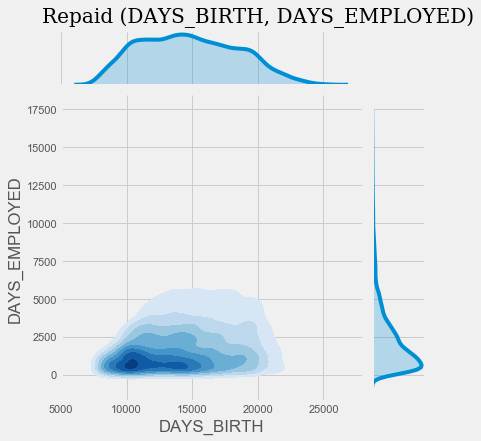

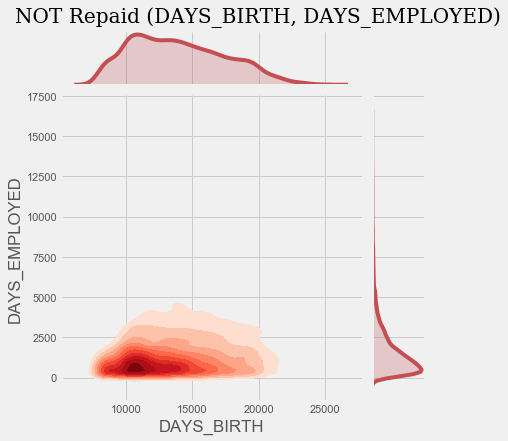

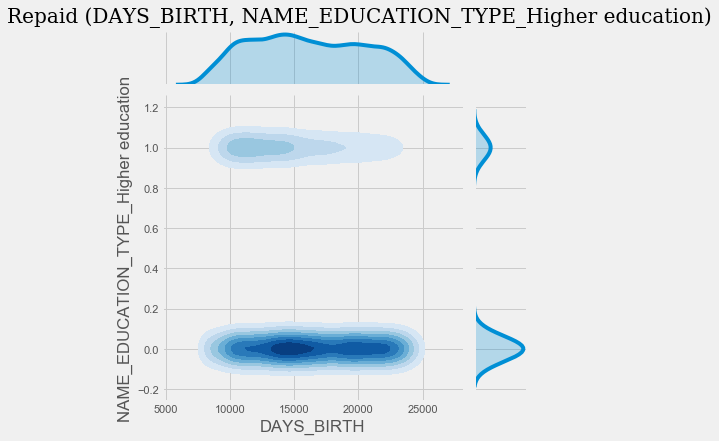

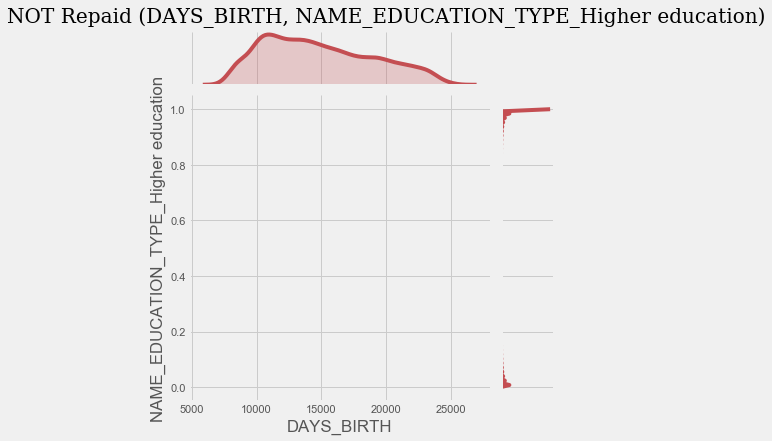

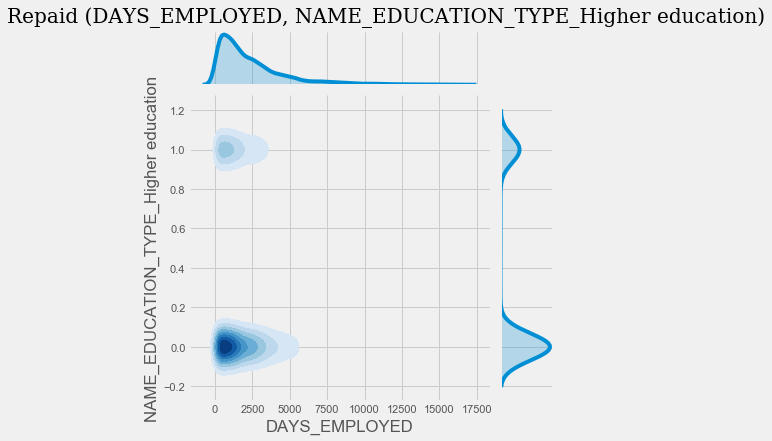

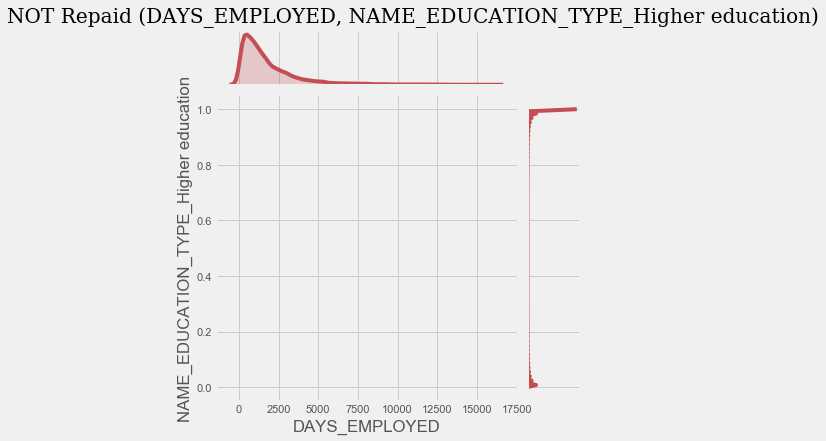

In [292]:
from itertools import combinations as cm
def joint_kde(df, x, y, target = "TARGET"):
    """
    x,y are the features for the correlation plot and target is target variable.
    """
    plt.style.use("fivethirtyeight")
    g1 = sns.JointGrid(x, y,
                       data=df[df['TARGET']==0].sample(20000, random_state =10))
                                                 # I am sampling 20000 datapoints
    g1 = g1.plot_joint(sns.kdeplot, cmap="Blues",  shade=True, shade_lowest=False)
    g1 = g1.plot_marginals(sns.kdeplot, shade=True)
    font = {'family': 'serif','color':  'black', 'weight': 'normal','size': 20}

    plt.title("Repaid ({}, {})".format(x,y), fontdict= font,  x = -2.2, y=1.22)

    g2 = sns.JointGrid(x, y,
                       data=df[df['TARGET']==1].sample(20000, random_state =10))
    g2 = g2.plot_joint(sns.kdeplot, cmap="Reds",  shade=True, shade_lowest=False)
    g2 = g2.plot_marginals(sns.kdeplot,color="r", shade=True)

    plt.title("NOT Repaid ({}, {})".format(x,y),fontdict= font,x = -2.2, y=1.22)
    
    return g1, g2

imp_ft = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
            "DAYS_BIRTH","DAYS_EMPLOYED", "NAME_EDUCATION_TYPE_Higher education"]

for x, y in cm(imp_ft,2):
    joint_kde(train, x, y)
    

### The correlations among  some features against the target variables become obvious in the Kernal Density plots. These intrarelations among features tell us feature engineering with this features might help our machine learning model learn better. 

# Feature Engineering

#### We have some idea about some important features, so we will engineer them so that our machine learning can learn from them. 

In [438]:
def features_engd(features, df_train, df_test, degree):
    """ Features are given as a list."""
    df_train_eng = df_train[features]
    df_test_eng = df_test[features]
    
    # Imputations
    imputer = Imputer(strategy='mean')
    # Instantiating polynomialfeaures
    pf = PolynomialFeatures(degree, include_bias =False)
    
    df_train_eng =imputer.fit_transform(df_train_eng)
    df_train_eng =pf.fit_transform(df_train_eng)
    
    df_test_eng =imputer.transform(df_test_eng)
    df_test_eng =pf.transform(df_test_eng)
    print("Shape of the Engineered Treaining Data: {}".format(df_train_eng.shape))
    print("Shape of the Engineered Test Data: {}".format(df_test_eng.shape))
    print("First 15 Engineered Features: {}".format(pf.get_feature_names(input_features = features)[:15]))
    
    # Converting the engineered features into a data frame
    df_train_eng = pd.DataFrame(df_train_eng, columns=pf.get_feature_names(input_features = features))
    df_test_eng = pd.DataFrame(df_test_eng, columns=pf.get_feature_names(input_features = features))

        
    # Now merging the engineered dataframes
    df_train_eng["SK_ID_CURR"] =df_train["SK_ID_CURR"]
    df_test_eng["SK_ID_CURR"] =df_test["SK_ID_CURR"]
    
    
    df_train = df_train.merge(df_train_eng, how= "left", on = "SK_ID_CURR")
    df_test = df_test.merge(df_test_eng, how= "left", on = "SK_ID_CURR")
        
    # Aligning the engineered train and test data
    if df_train.shape != df_test.shape:
        df_train, df_test = align(df_train, df_test)
    
    # Adding the "TARGET" features to the engineered dataframe 
    df_train_eng["TARGET"] =df_train["TARGET"]
    
    return df_train_eng, df_test_eng, df_train, df_test

features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
            "DAYS_BIRTH","DAYS_EMPLOYED", "NAME_EDUCATION_TYPE_Higher education"]

df_train_eng, df_test_eng, eng_train, eng_test = features_engd(features, train, test, degree=3)

Shape of the Engineered Treaining Data: (307511, 83)
Shape of the Engineered Test Data: (48744, 83)
First 15 Engineered Features: ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'NAME_EDUCATION_TYPE_Higher education', 'EXT_SOURCE_1^2', 'EXT_SOURCE_1 EXT_SOURCE_2', 'EXT_SOURCE_1 EXT_SOURCE_3', 'EXT_SOURCE_1 DAYS_BIRTH', 'EXT_SOURCE_1 DAYS_EMPLOYED', 'EXT_SOURCE_1 NAME_EDUCATION_TYPE_Higher education', 'EXT_SOURCE_2^2', 'EXT_SOURCE_2 EXT_SOURCE_3', 'EXT_SOURCE_2 DAYS_BIRTH']
 Shape of train data before alinging: (307511, 321) 
 Shape of test data before alinging: (48744, 320)
 Shape of train data after alinging: (307511, 321) 
 Shape of test data after alinging: (48744, 320)


#### Let's look at the correlation among newly engineered features against the target variables. 

In [402]:
df_train_eng.corr()["TARGET"].sort_values().head()

EXT_SOURCE_2 EXT_SOURCE_3                -0.194235
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189592
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181416
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176589
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.171727
Name: TARGET, dtype: float64

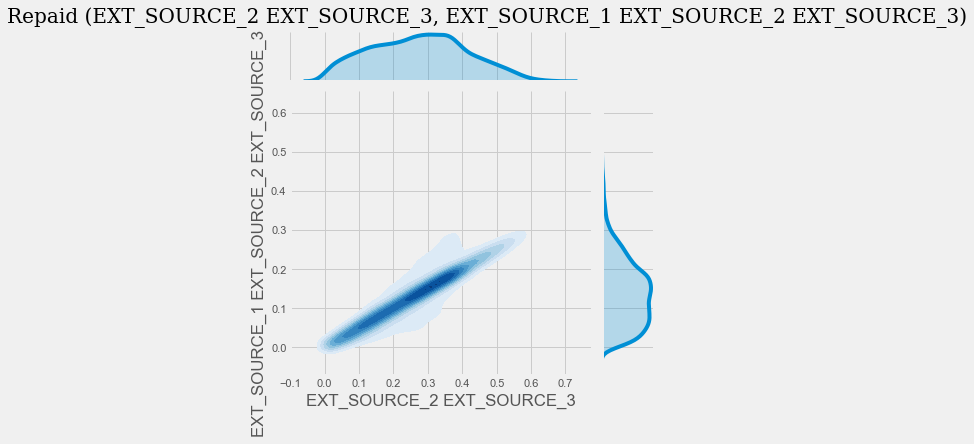

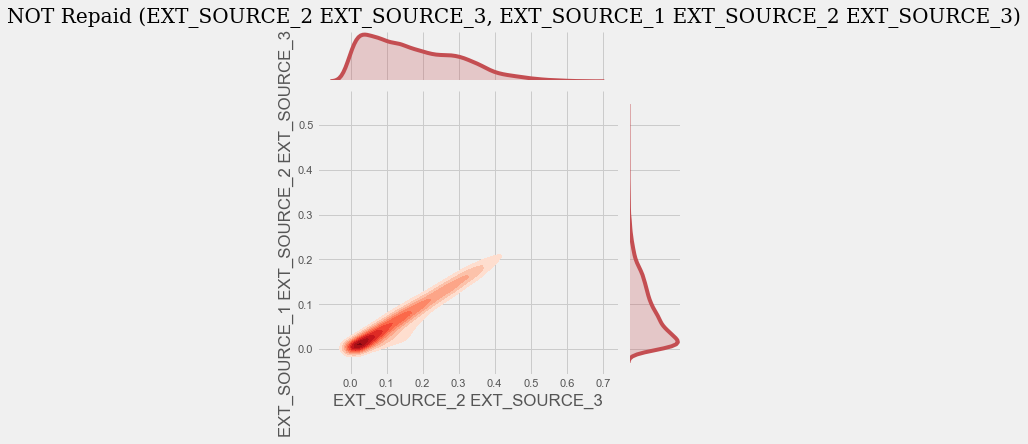

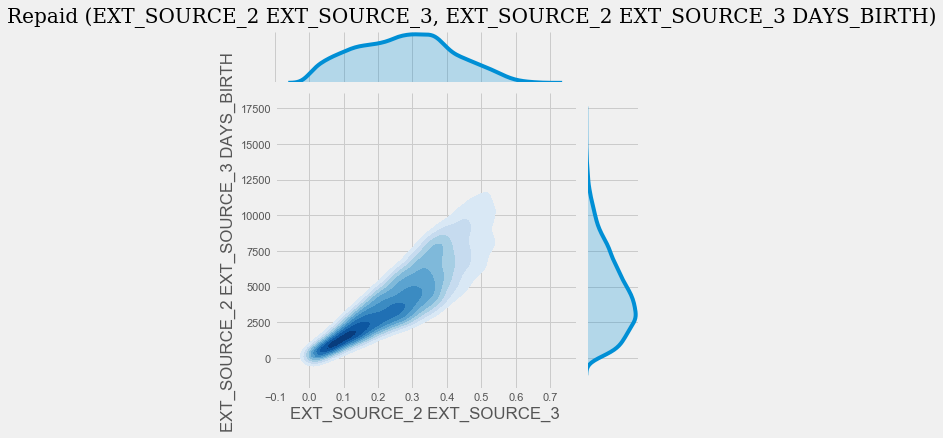

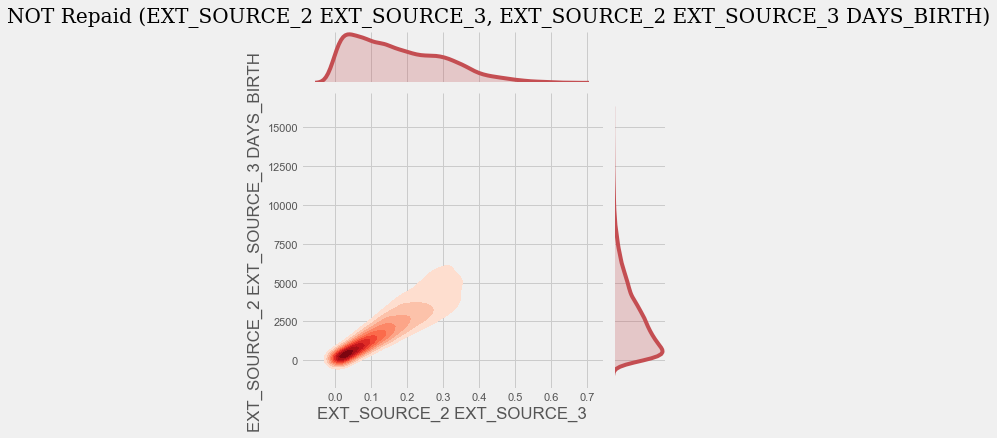

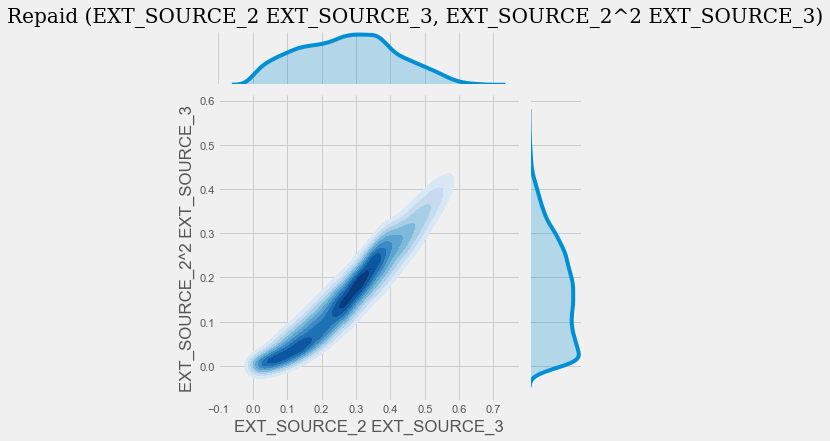

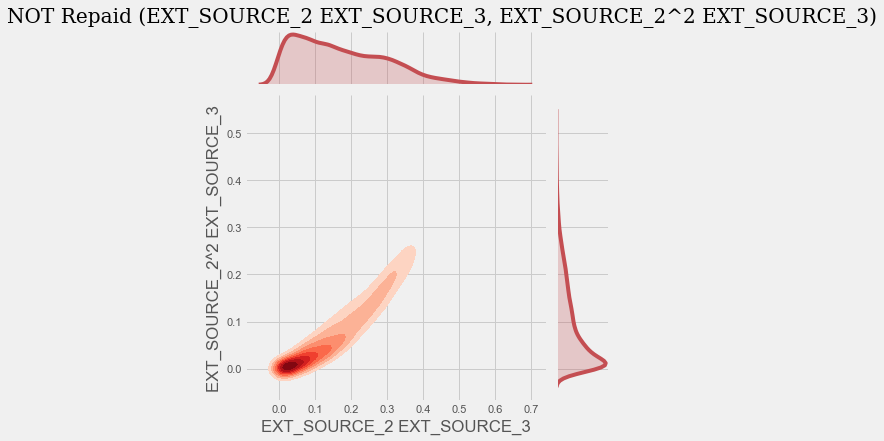

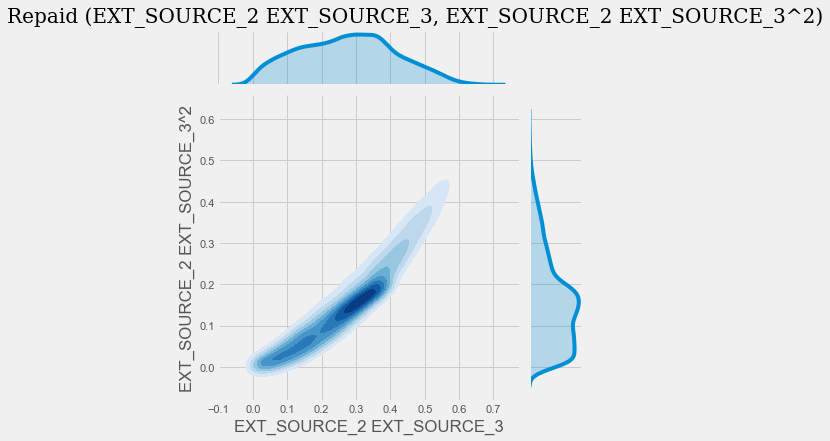

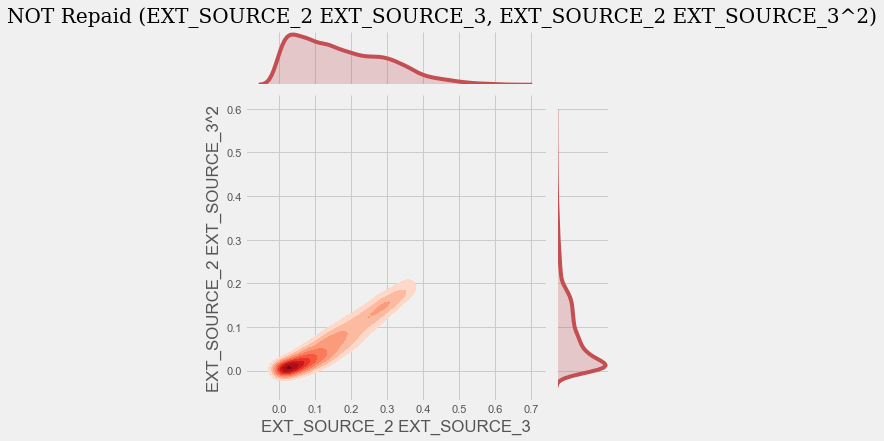

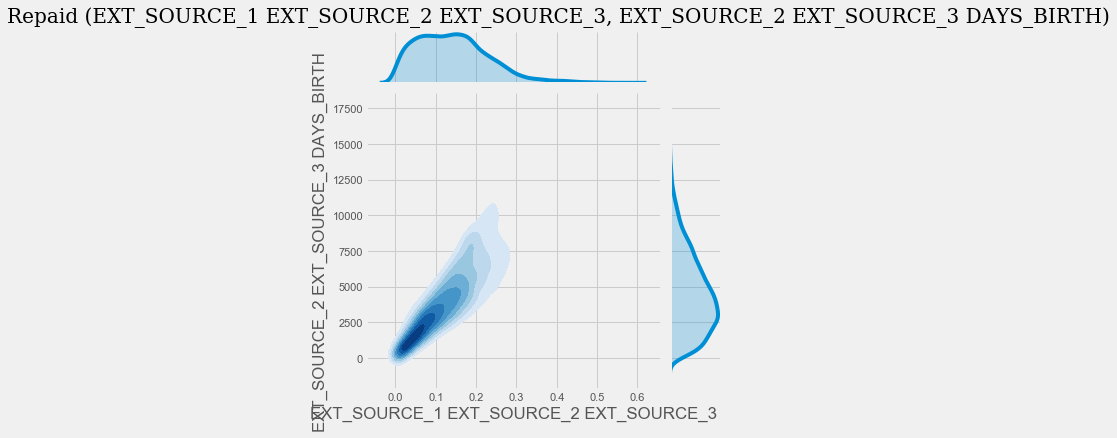

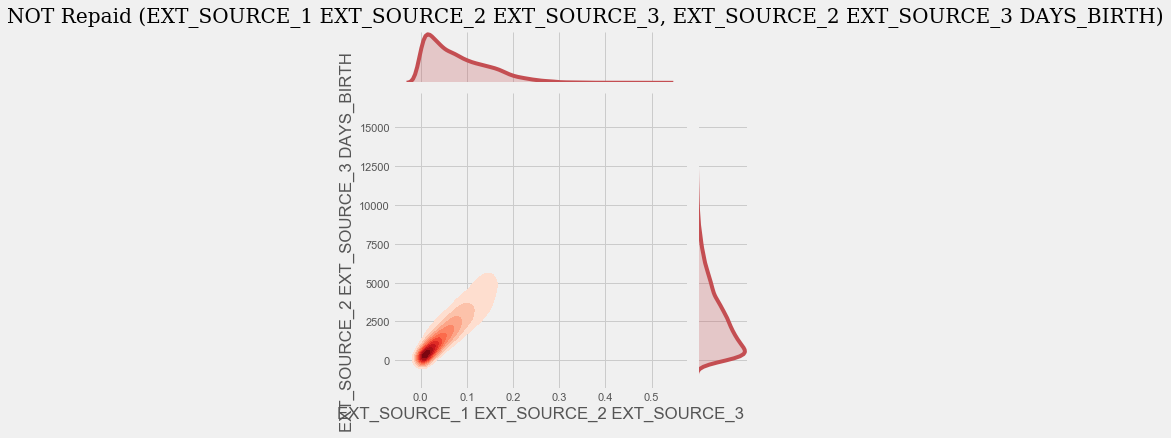

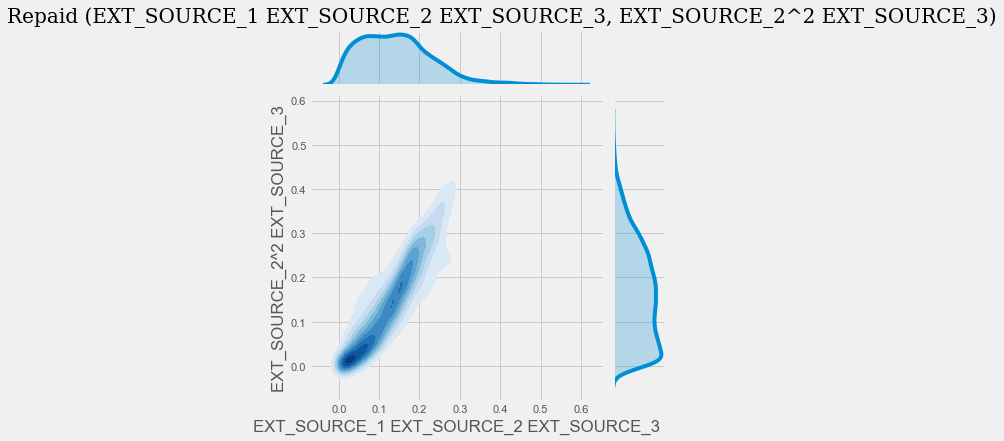

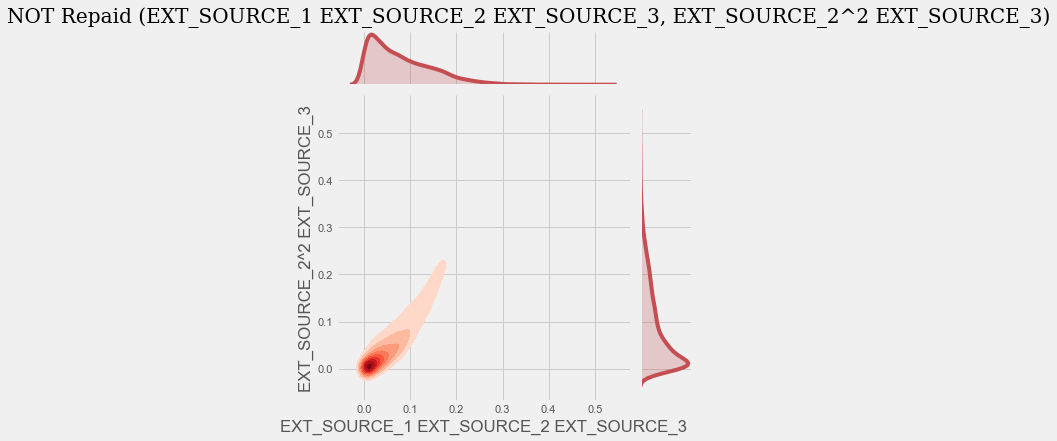

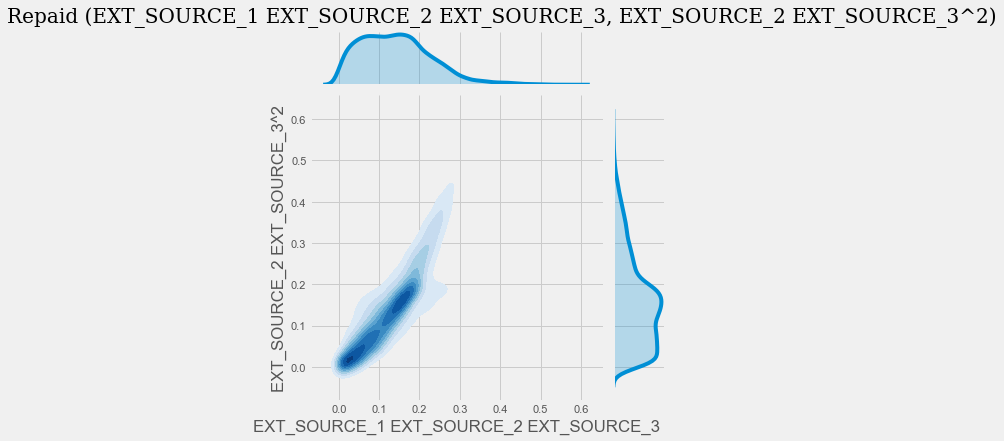

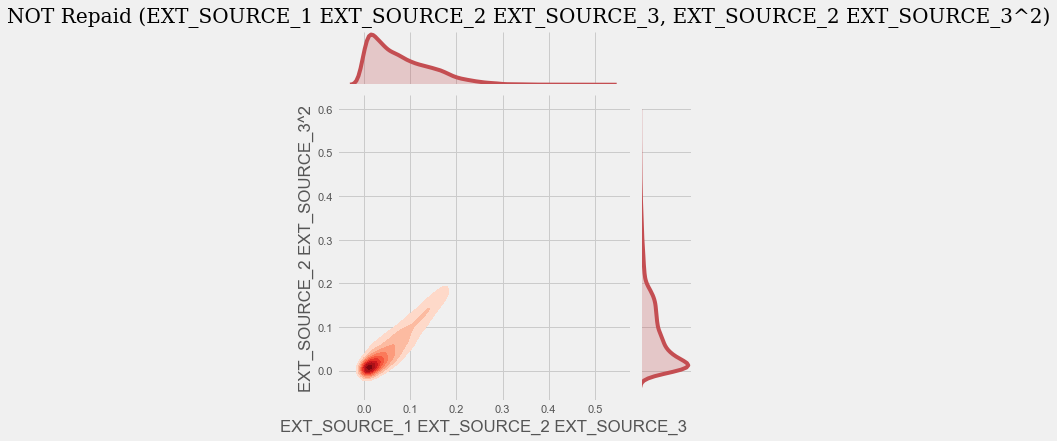

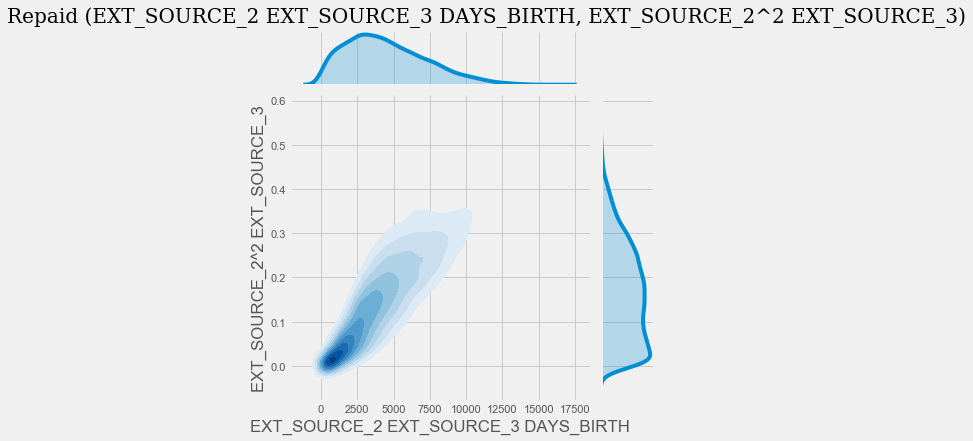

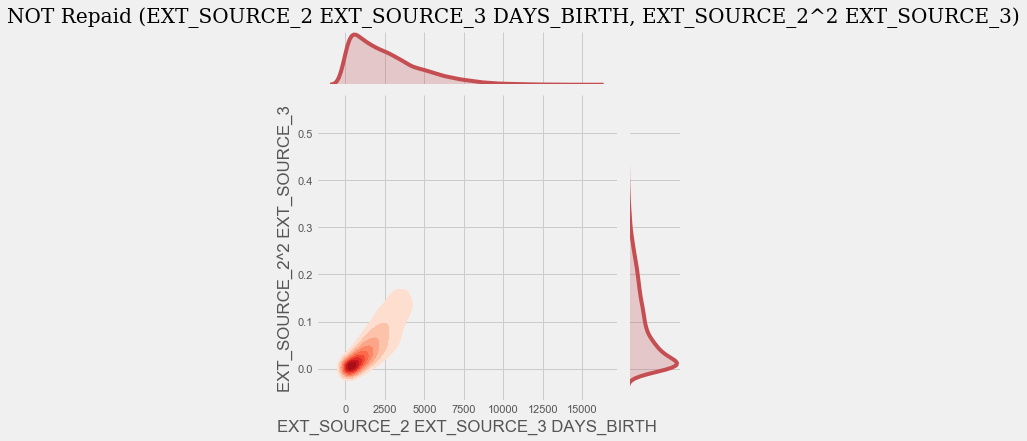

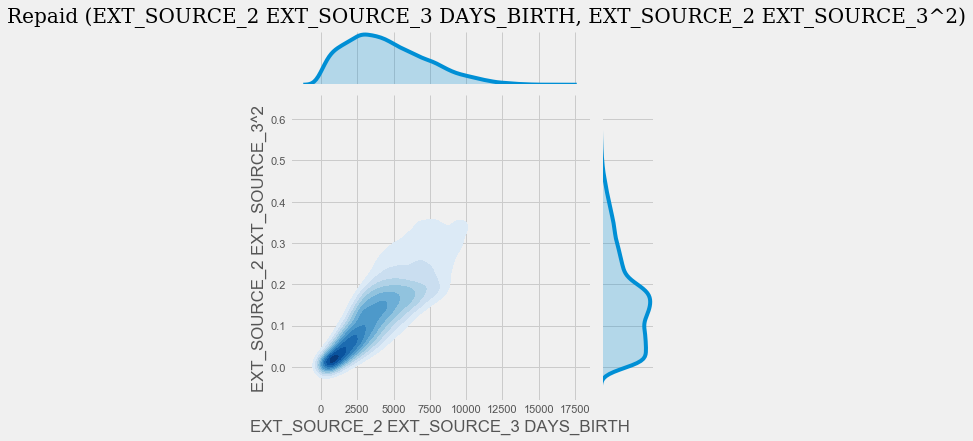

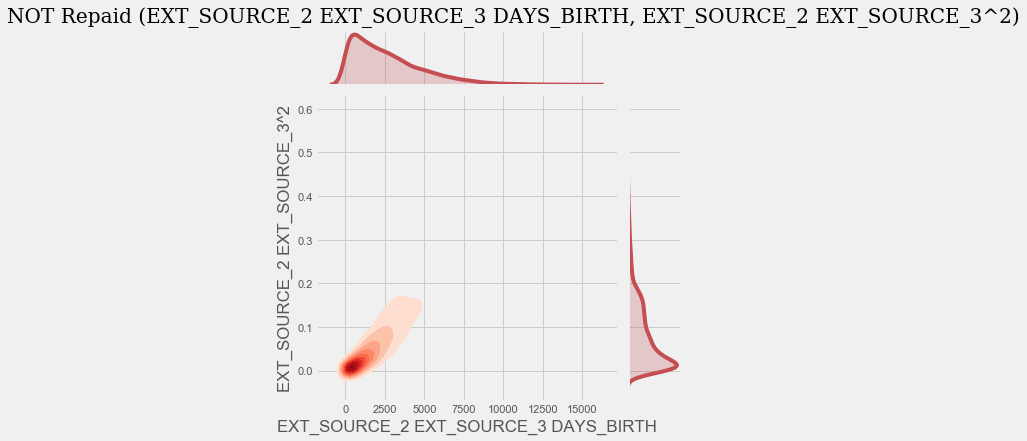

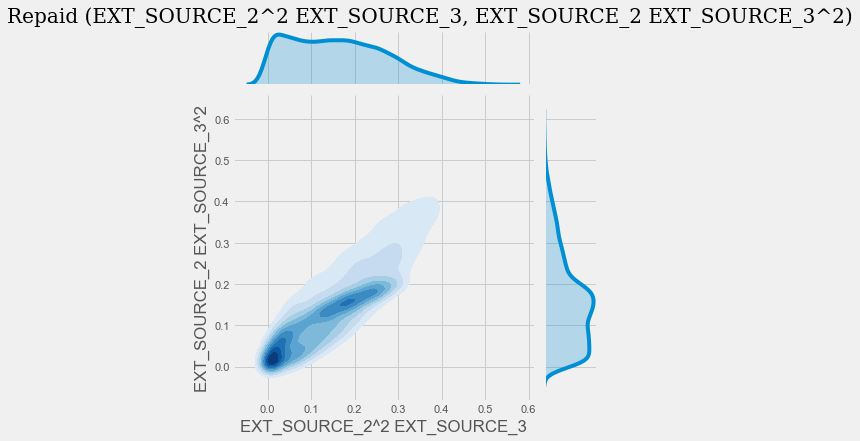

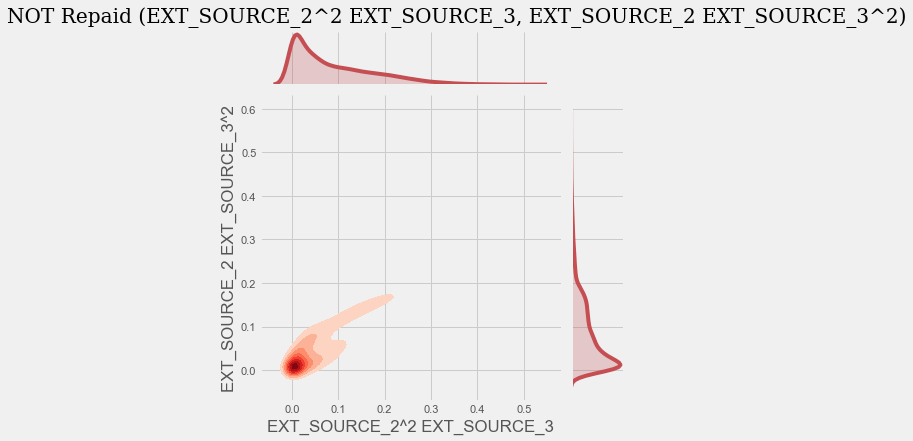

In [404]:
eng_fts = ["EXT_SOURCE_2 EXT_SOURCE_3","EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3",
           "EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH", "EXT_SOURCE_2^2 EXT_SOURCE_3", "EXT_SOURCE_2 EXT_SOURCE_3^2"]
for x, y in cm(eng_fts,2):
    joint_kde(df_train, x, y, target = "TARGET")

####  Kernal density plots of the engineered features cleary shows differential structures for the two target variables, so this engineered features may help our machine learning models. 

In [424]:
from sklearn_pandas import DataFrameMapper
from sklearn_pandas import CategoricalImputer
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures  
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import  OneVsRestClassifier
from sklearn.model_selection import train_test_split
import multilabel_train_test_split

In [429]:
# Here I am building a pipeline

trt

array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]], dtype=uint8)

In [446]:
def log_reg(train, test, file_name= "log_reg", C=1):
# Here I am building a pipeline
    trn = train.drop("TARGET", axis=1).values
    trt = train["TARGET"]
    trt = pd.get_dummies(trt).values
    pl = Pipeline([
        ("imputaton", Imputer(strategy="median")),
        ("scale", MinMaxScaler(feature_range=(0, 1))),
        ("clf", OneVsRestClassifier(estimator=LogisticRegression(C=C,class_weight=None,
                                                                 dual=False, fit_intercept=True,
                                                                 intercept_scaling=1, max_iter=100
                                                                 ,multi_class='ovr', n_jobs=1, 
                                                                 penalty='l2', random_state=4,
                                                                 solver='liblinear', tol=0.0001, 
                                                                 verbose=0, warm_start=False)))
    ])
    pl.fit(trn,trt)
    proba = pl.predict_proba(test)
    submit = test[["SK_ID_CURR"]]
    submit["TARGET"]  =proba[:,1]
    submit.to_csv(file_name + '.csv', index = False)

In [ ]:
log_reg(eng_train, eng_test, file_name= "log_reg_eng", C=1)

#### This model generated score of 0.734, which I take as a baseline score.


In [443]:
# Now including the interactions term
# The hyperparameter C =1
log_reg(eng_train, eng_test, file_name= "log_reg_eng", C=1)

#### When I included the engineered features, the model generated score of 0.738, which is slightly better than previous submission. 

In [448]:
log_reg(eng_train, eng_test, file_name= "log_reg_eng_c_0.01", C=0.01)

#### This model generated a score of 0.731, which was not an improvement.

### Distribution of target variables in each of the columns in the training dataset

In [ ]:
# Let's see

In [ ]:
# Separating Categorical columns if any
categorical_feature_mask = train_ft_eng.dtypes == object
categorical_columns = train.columns[categorical_feature_mask].tolist()

# Separating Non-Categorical columns if any
non_categorical_columns = train_ft_eng.columns[~categorical_feature_mask].tolist()

# Apply numeric imputer
numeric_imputation_mapper = DataFrameMapper([(numeric_feature,Imputer(strategy="median")) for numeric_feature in non_categorical_columns],
                                            input_df=True,
                                            df_out=True
                                           )

# Apply categorical imputer
categorical_imputation_mapper = DataFrameMapper([(category_feature, CategoricalImputer()) for category_feature in categorical_columns],
                                                input_df=True,
                                                df_out=True
                                               )


# Combine the numeric and categorical transformations
numeric_categorical_union = FeatureUnion([
                                          ("num_mapper", numeric_imputation_mapper),
                                          ("cat_mapper", categorical_imputation_mapper)
                                         ])

pl = Pipeline([
    ("featureunion", numeric_categorical_union),
    ("polyfeatures", PolynomialFeatures(degree = 3))
])
pl.fit_transform()